In [3]:
# PANDAS & DATETIME
import pandas as pd
from datetime import datetime,timedelta

# NUMPY
import numpy as np

# PLOT LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns

# STATSMODEL
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# SCIPY
import scipy.stats as stats
from scipy.integrate import trapezoid

#SKLEARN FOR PREPROCESSING
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# METRICS
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# IMBALANCE LEARN FOR PREPROCESSING
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler

# SKLEARN FOR MODEL TRAIN
from sklearn.model_selection import RandomizedSearchCV

# MODEL:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [4]:
# Import datasets
applicants = pd.read_csv('application_record.csv')
credit = pd.read_csv('credit_record.csv')

<span style="background-color: #007ACC; color: white; padding: 5px 10px; font-size: 62px;">DATA VISUALIZATION</span>

> # Start with *<span style="color:red">Binary Variables</span>* analysis

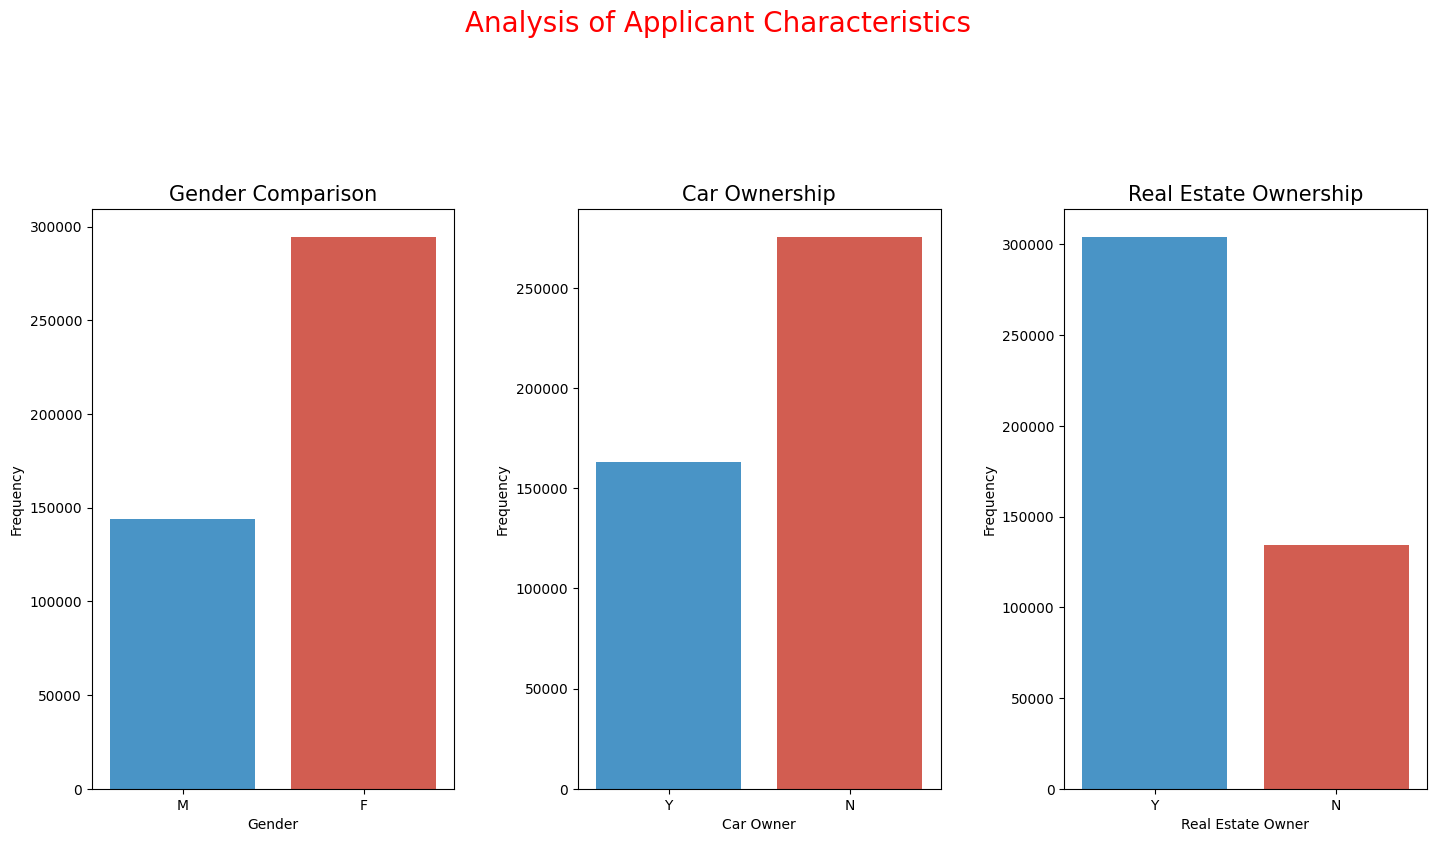

In [5]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 8))

# Set a custom color palette
custom_palette = sns.color_palette(["#3498db", "#e74c3c"])

# Set the main title with more spacing
fig.suptitle('Analysis of Applicant Characteristics', size=20, color='r', y=1.08)

# Plot gender comparison
sns.countplot(data=applicants, x='CODE_GENDER', ax=axes[0], palette=custom_palette)
axes[0].set_title('Gender Comparison', fontsize=15)
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Frequency')

# Plot car ownership
sns.countplot(data=applicants, x='FLAG_OWN_CAR', ax=axes[1], palette=custom_palette)
axes[1].set_title('Car Ownership', fontsize=15)
axes[1].set_xlabel('Car Owner')
axes[1].set_ylabel('Frequency')

# Plot real estate ownership
sns.countplot(data=applicants, x='FLAG_OWN_REALTY', ax=axes[2], palette=custom_palette)
axes[2].set_title('Real Estate Ownership', fontsize=15)
axes[2].set_xlabel('Real Estate Owner')
axes[2].set_ylabel('Frequency')

# Add some extra space between subplots
plt.tight_layout(pad=3)

# Show the plot
plt.show()

# Analysis of Applicant Characteristics

In this analysis, we explore key characteristics of applicants to gain insights into their demographic and ownership profiles. We focus on three variables: 'Gender Comparison,' 'Car Owner,' and 'Real Estate Owner.' Let's delve into the findings:

## Gender Comparison

The 'Gender Comparison' plot illustrates the gender distribution among applicants. We observe the following:

- There is a **significant disparity** between the number of male and female applicants.
- The number of female applicants is **approximately twice** that of male applicants.

## Car Owner

The 'Car Owner' plot provides insights into car ownership among applicants:

- A **substantial portion** of applicants do not own a car.
- The frequency of applicants who own a car is comparatively lower, implying that a significant portion of applicants **lacks vehicle ownership**.

## Real Estate Owner

The 'Real Estate Owner' plot examines the ownership of real estate properties:

- **Most applicants are real estate owners.**
- The frequency of applicants who own real estate is higher, indicating that a majority of applicants **have investments in real estate**.

## Overall Observations

A standout observation from this analysis is the **significant gender disparity** among applicants, with a notably higher number of female applicants. Additionally, the majority of applicants **own real estate properties**, while a substantial portion **does not own a car**.

These findings provide valuable insights into the demographic and ownership characteristics of the applicant pool, which can inform further analyses and decision-making processes.


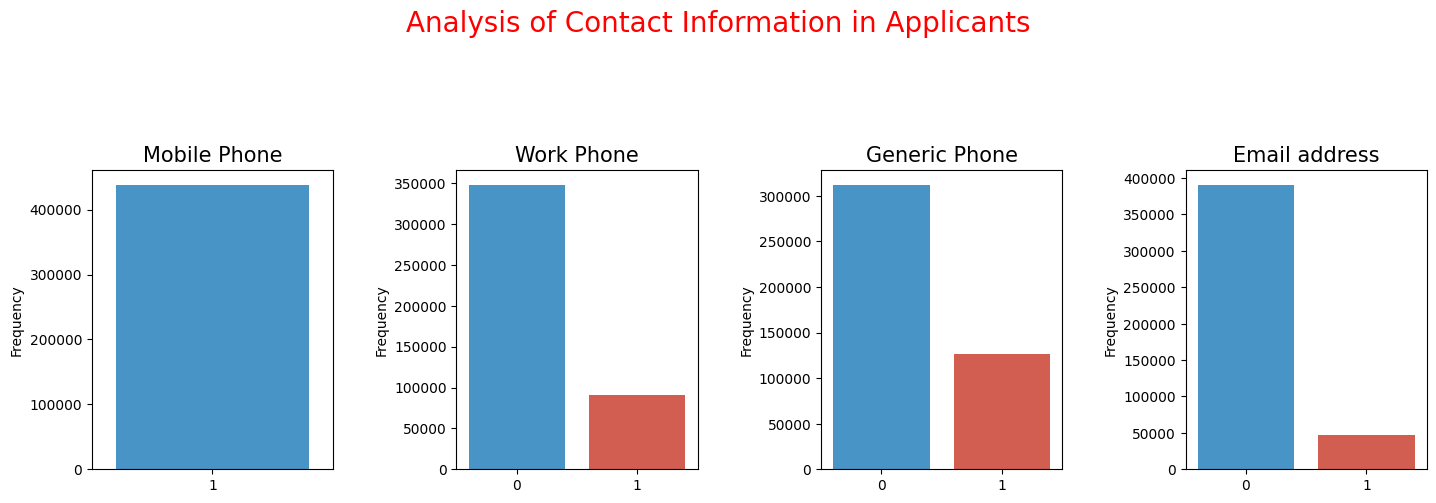

In [6]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Set a custom color palette
custom_palette = sns.color_palette(["#3498db", "#e74c3c"])

# Set the main title with more spacing
fig.suptitle('Analysis of Contact Information in Applicants', size=20, color='r', y=1.05)

# Plot mobile phone
sns.countplot(data=applicants, x='FLAG_MOBIL', ax=axes[0], palette=custom_palette)
axes[0].set_title('Mobile Phone', fontsize=15)
axes[0].set_xlabel('')
axes[0].set_ylabel('Frequency')

# Plot work phone
sns.countplot(data=applicants, x='FLAG_WORK_PHONE', ax=axes[1], palette=custom_palette)
axes[1].set_title('Work Phone', fontsize=15)
axes[1].set_xlabel('')
axes[1].set_ylabel('Frequency')

# Plot generic phone
sns.countplot(data=applicants, x='FLAG_PHONE', ax=axes[2], palette=custom_palette)
axes[2].set_title('Generic Phone', fontsize=15)
axes[2].set_xlabel('')
axes[2].set_ylabel('Frequency')

# Plot email address
sns.countplot(data=applicants, x='FLAG_EMAIL', ax=axes[3], palette=custom_palette)
axes[3].set_title('Email address', fontsize=15)
axes[3].set_xlabel('')
axes[3].set_ylabel('Frequency')

# Add some extra space between subplots
plt.tight_layout(pad=3)

# Show the plot
plt.show()

# Analysis of Contact Information in Applicants

In this analysis, we examine the contact information of applicants to gain insights into their communication methods. Specifically, we explore four binary variables related to contact information: Mobile Phone, Work Phone, Generic Phone, and Email Address.

## Key Findings

### 1. Mobile Phone

- **Observation**: 
  - Every applicant seems to possess at least one mobile phone, indicating universal mobile phone ownership among applicants.

### 2. Work Phone

- **Observations**:
  - A smaller proportion of applicants have a work phone.
  - The frequency of applicants with a work phone is relatively lower compared to those without.

### 3. Generic Phone

- **Observations**:
  - The 'Generic Phone' category suggests whether applicants have any phone other than a mobile or work phone.
  - The frequency of applicants with a generic phone is intermediate, indicating that some applicants have additional phone lines or devices.

### 4. Email Address

- **Observations**:
  - The 'Email Address' category represents whether applicants have provided an email address.
  - The majority of applicants have provided an email address.
  - The frequency of applicants with an email address is significantly higher than those without, suggesting that email communication is prevalent among applicants.


> ## *<span style="color:red">Discrete & Continuous variables</span>* analysis

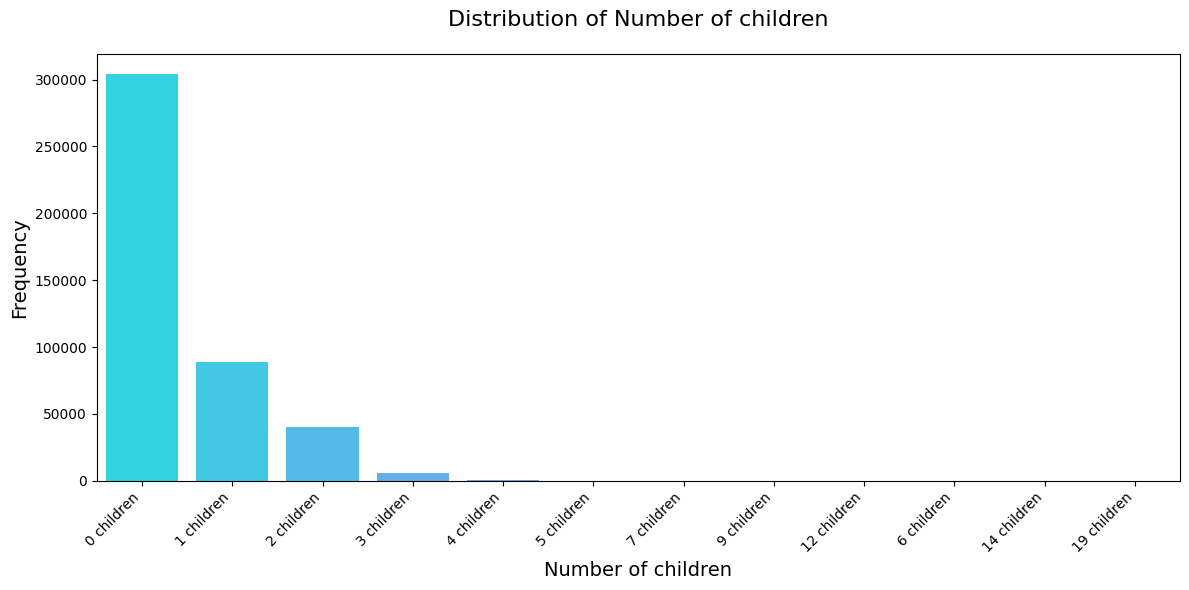

In [7]:
# Calculate the order based on the frequency of family members
order = applicants['CNT_CHILDREN'].value_counts().index

# Define custom colors for the bars
custom_palette = sns.color_palette("cool", n_colors=len(order))

# Create a countplot for the number of family members with the specified order and custom colors
plt.figure(figsize=(12, 6))  # Set the figure size
ax = sns.countplot(
    x=applicants['CNT_CHILDREN'],
    palette=custom_palette,  # Use custom colors
    order=order
)

# Customize labels for the y-axis and x-axis
plt.xlabel('Number of children', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize tick labels on the x-axis for better readability
ax.set_xticklabels([f'{count} children' for count in order], fontsize=10, rotation=45, ha="right")

# Customize the title of the plot
ax.set_title('Distribution of Number of children', fontsize=16, pad=20)

# Show the plot
plt.tight_layout()
plt.show()

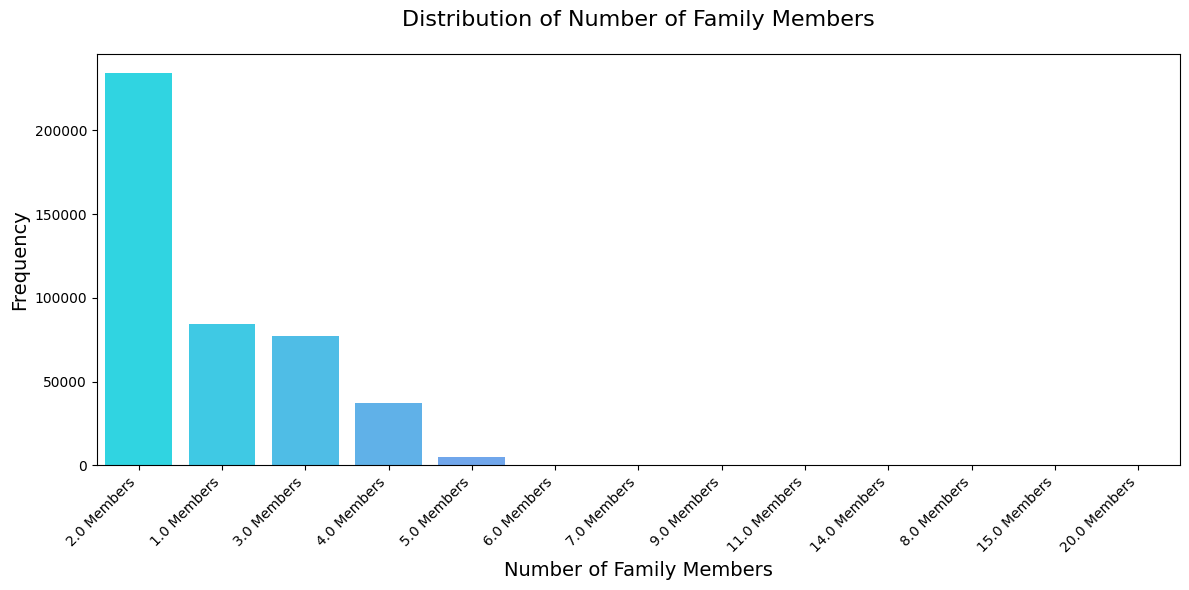

In [8]:
# Calculate the order based on the frequency of family members
order = applicants['CNT_FAM_MEMBERS'].value_counts().index

# Define custom colors for the bars
custom_palette = sns.color_palette("cool", n_colors=len(order))

# Create a countplot for the number of family members with the specified order and custom colors
plt.figure(figsize=(12, 6))  # Set the figure size
ax = sns.countplot(
    x=applicants['CNT_FAM_MEMBERS'],
    palette=custom_palette,  # Use custom colors
    order=order
)

# Customize labels for the y-axis and x-axis
plt.xlabel('Number of Family Members', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


# Customize tick labels on the x-axis for better readability
ax.set_xticklabels([f'{count} Members' for count in order], fontsize=10, rotation=45, ha="right")

# Customize the title of the plot
ax.set_title('Distribution of Number of Family Members', fontsize=16, pad=20)

# Show the plot
plt.tight_layout()
plt.show()

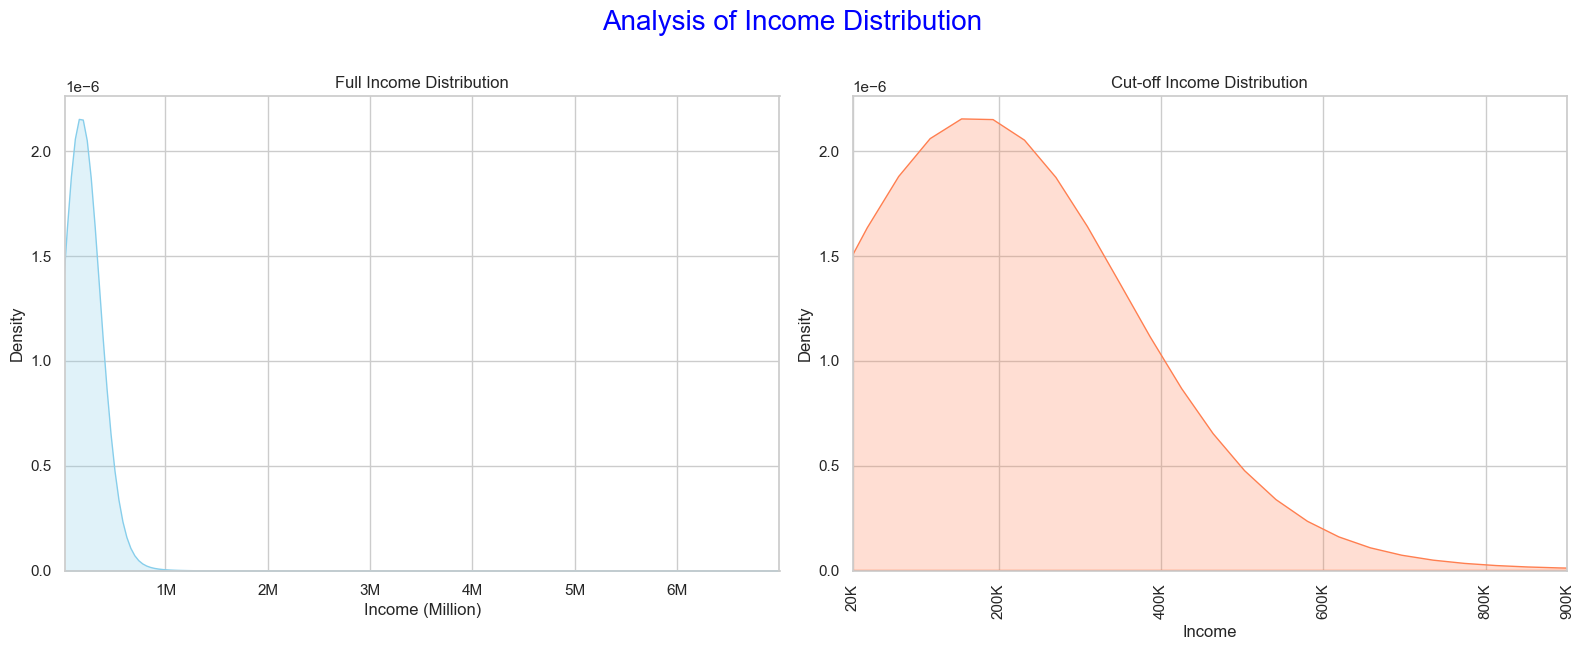

In [9]:
# Create a Seaborn KDE plot with custom styling
plt.figure(figsize=(16, 6))  # Set the figure size

# Customize the styling of the KDE plots
sns.set(style="whitegrid")  # Use a white grid background

# Create a grid of subplots with 1 row and 2 columns
plt.subplot(1, 2, 1)  # The first subplot (left side)
ax1 = sns.kdeplot(applicants['AMT_INCOME_TOTAL'], color='skyblue', fill=True, bw_adjust=20)
plt.xlim(20000, 7000000)
plt.xlabel('Income (Million)')
plt.title('Full Income Distribution')

# Adjust x-axis ticks for millions
ax1.set_xticks([1000000, 2000000, 3000000, 4000000, 5000000, 6000000])
ax1.set_xticklabels(['1M', '2M', '3M', '4M', '5M', '6M'])

plt.subplot(1, 2, 2)  # The second subplot (right side)
ax2 = sns.kdeplot(applicants['AMT_INCOME_TOTAL'], color='coral', fill=True, bw_adjust=20)
income_ticks = [i for i in range(20000, 900000, 100000)]
ax2.set_xticks(income_ticks)
plt.xlim(20000, 900000)
plt.xlabel('Income')
plt.xticks(rotation=90)
plt.title('Cut-off Income Distribution')

# Reduce the number of x-axis ticks
ax2.set_xticks([20000, 200000, 400000, 600000, 800000, 900000])
ax2.set_xticklabels([f'{int(x / 1000)}K' for x in ax2.get_xticks()])
# Adjust spacing between subplots
plt.tight_layout()

# Add a super title with more spacing
plt.suptitle('Analysis of Income Distribution', size=20, color='blue', y=1.08)

# Show the plot
plt.show()


In [10]:
# Try to calculate Area under the curve to check how many values are between certain limits
# Define the income limits
start_point = applicants['AMT_INCOME_TOTAL'].min()
# 500K is an arbitrary value i choose simply looking at the distribution, further analysis is needed to confirm o reject 500K as a
# good upper boundary for keep out outliers
end_point = applicants[applicants['AMT_INCOME_TOTAL'] <= 500000]['AMT_INCOME_TOTAL'].max()

In [11]:
def integral(data, feature, start_point, end_point):
    # Calculate the area under the entire 'feature' column
    x_total = np.linspace(data[feature].min(), data[feature].max(), num=len(data[feature]))
    y_total = data[feature]
    total_area = trapezoid(y_total, x_total)  # Define or replace trapezoid function

    # Calculate the area between the start and end points using trapezoidal approximation
    x_point = np.linspace(start_point,end_point,num = len(data[feature]))  # Create an array with two points
    y_point = data[feature]
    area_between_points = trapezoid(y_point, x_point)  # Define or replace trapezoid function

    # Check for division by zero
    if total_area == 0:
        return "The total area is zero, cannot calculate the percentage."

    # Calculate the percentage of the area
    percentage_area = (area_between_points / total_area) * 100

    return f"The percentage of the area under the curve between {start_point} and {end_point} is about: {percentage_area:.2f}%"

In [12]:
integral(applicants,'AMT_INCOME_TOTAL',start_point,end_point)

'The percentage of the area under the curve between 26100.0 and 499500.0 is about: 7.04%'

# Comprehensive Data Analysis Report

## Introduction

This comprehensive report provides a detailed analysis of various aspects of applicant data. The analysis is based on visualizations and insights derived from three different plots. Each section discusses the findings and conclusions related to the specific plot.

---

## Section 1: Number of Children for Applicants

### Plot Description

The first section focuses on the distribution of the number of children among applicants.

#### Findings

- **Most Applicants Have 0 or 1 Child:** The majority of applicants have either 0 or 1 child, suggesting that a significant portion of the dataset has small families.
- **Few Applicants Have 2 or More Children:** The frequency of applicants with 2 or more children decreases as the number of children increases, indicating that fewer applicants have larger families.
- **Imbalanced Distribution:** The distribution of the number of children is imbalanced, with a long tail on the right side, which may indicate potential data quality issues.

#### Conclusion

This section provides an overview of the distribution of the number of children among applicants, emphasizing the prevalence of small families and the potential need for data quality investigation.

---

## Section 2: Number of Family Members for Applicants

### Plot Description

The second section explores the distribution of the number of family members among applicants.

#### Findings

- **Most Applicants Have 2 or 3 Family Members:** The majority of applicants have either 2 or 3 family members, indicating that many applicants have small families.
- **Variability in Family Size:** There is variability in family sizes, with some applicants having larger families, including those with 1 or 4 family members.
- **Imbalanced Distribution:** The distribution of family sizes is imbalanced, similar to the number of children distribution, raising potential data quality concerns.

#### Conclusion

This section provides insights into the distribution of family sizes among applicants, highlighting the prevalence of small families and the presence of data quality considerations.

---

## Section 3: Analysis of Income Distribution

### Plot Description

In this section, we delve into the analysis of income distribution among applicants, building upon the visualizations and calculations from the previous code.

#### Findings

- **Low to Moderate Incomes:** In the left subplot depicting the full income distribution, the left peak of the distribution represents applicants with lower to moderate incomes. This group comprises the majority of the dataset, indicating a common income range among the applicants.
- **Outliers:** On the right side of both plots, a long and pronounced tail can be observed. This tail signifies income outliers with exceptionally high incomes compared to the majority. These outliers are visible in both the full income distribution and the cutoff income distribution, suggesting their presence within various income ranges.
- **Negatively Skewed Distribution:** The pronounced tail of high-income outliers results in a negatively skewed distribution. This skewness highlights the asymmetry of the income distribution, with a longer tail on the lower-income side and a shorter but higher tail on the higher-income side.
- **Area under Curve:** Calculating the area under the curve provided us with the interesting information that more than 90% of the data is between the minimum income value of the dataset and a maximum of no more than 500K. Since the variable has a range between about 20K and more than 6M, it is definitely something to remember when we go to work on outliers.

---

## Overall Conclusion

In conclusion, this comprehensive report offers insights into various aspects of applicant data, including family size, number of children, and income distribution. These visualizations provide valuable information for further analysis and decision-making. However, the presence of imbalanced distributions and potential data quality issues should be taken into account when using this data.

---


> # *<span style="color:red">Categorical variables</span>* analysis

In [12]:
def count_plot(data, feature, rot=None, palette='inferno'):
    # Set style and context for the plot
    plt.figure(figsize=(10, 8))
    sns.set(style="whitegrid")
    sns.set_context("talk")

    # Create the countplot
    ax = sns.countplot(x=data[feature], palette=palette,
                       order=data[feature].value_counts().index)

    # Customize labels for the y-axis and x-axis
    plt.ylabel('Frequency', fontsize=14, labelpad=20)
    plt.xlabel('Category', fontsize=14, labelpad=20)

    # Add a super title
    plt.suptitle(f"Distribution of {feature}", size=20, color='blue', y=1.05)

    # Rotate x-axis labels if rotation is specified
    if rot is not None and isinstance(rot, int):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=rot)

    # Show the plot
    plt.tight_layout()
    plt.show()


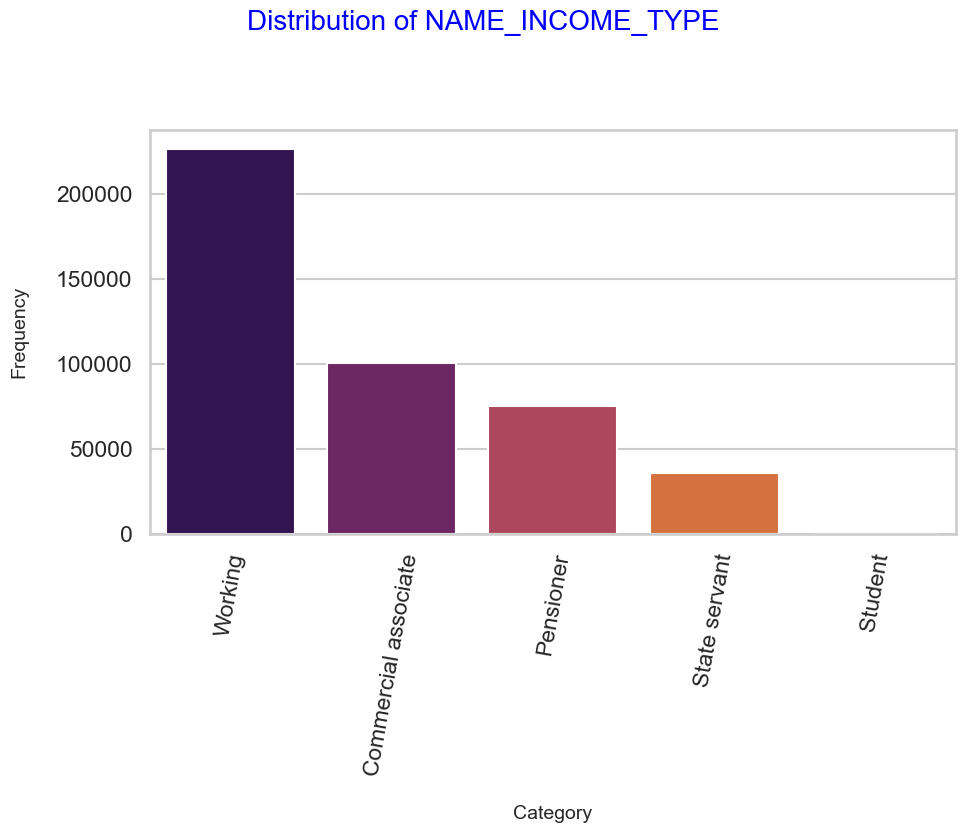

In [13]:
count_plot(applicants,'NAME_INCOME_TYPE',rot = 80)

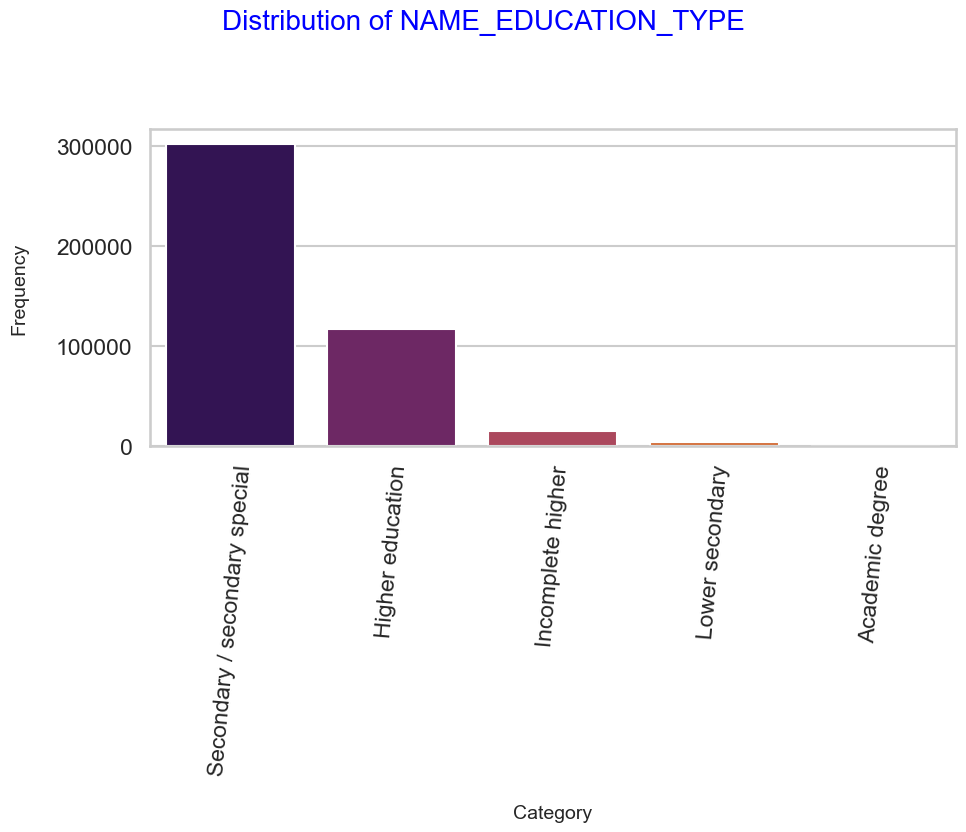

In [14]:
count_plot(applicants,'NAME_EDUCATION_TYPE',rot=85)

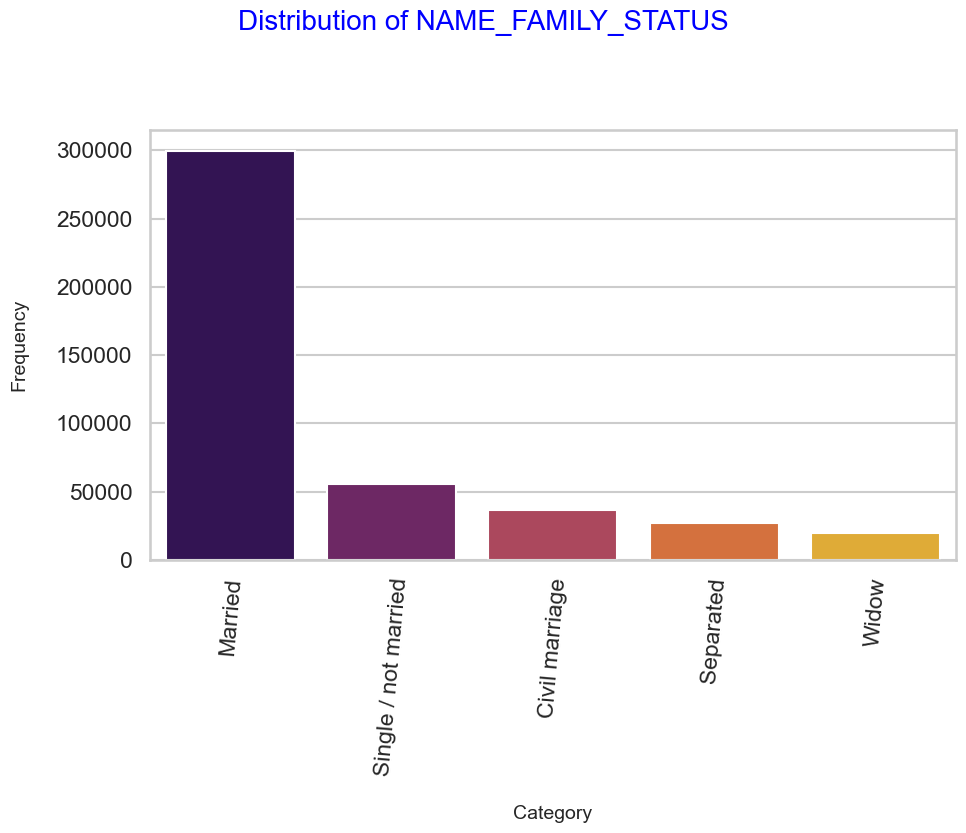

In [15]:
count_plot(applicants,'NAME_FAMILY_STATUS',rot=85)

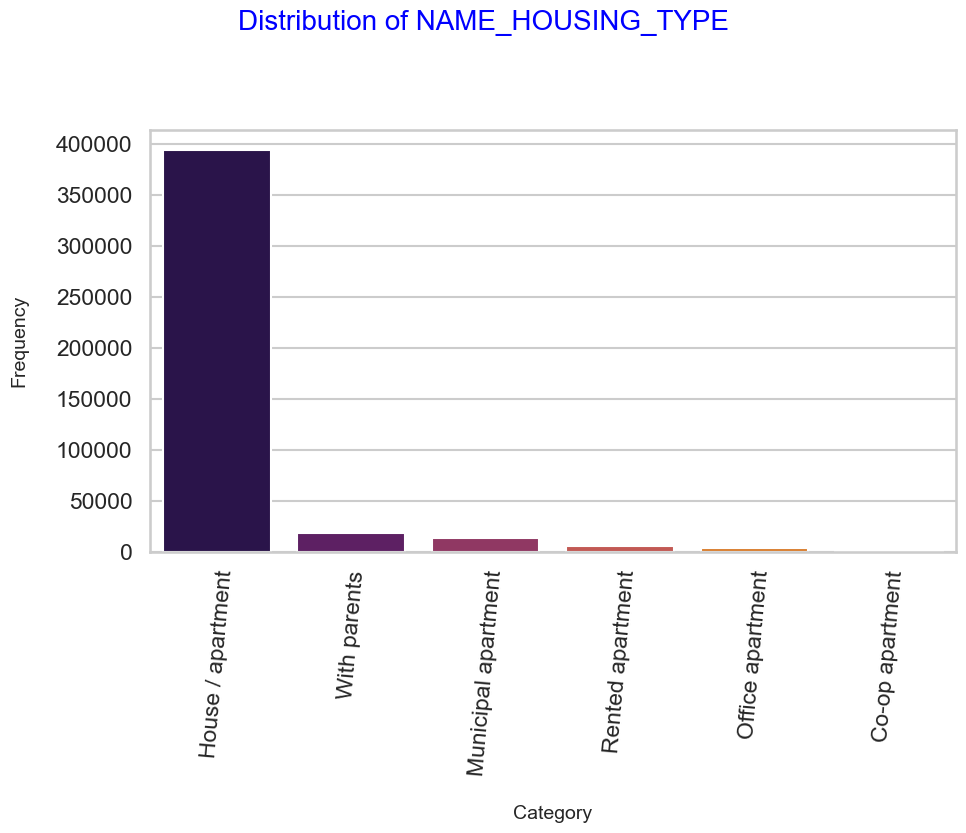

In [16]:
count_plot(applicants,'NAME_HOUSING_TYPE',rot=85)

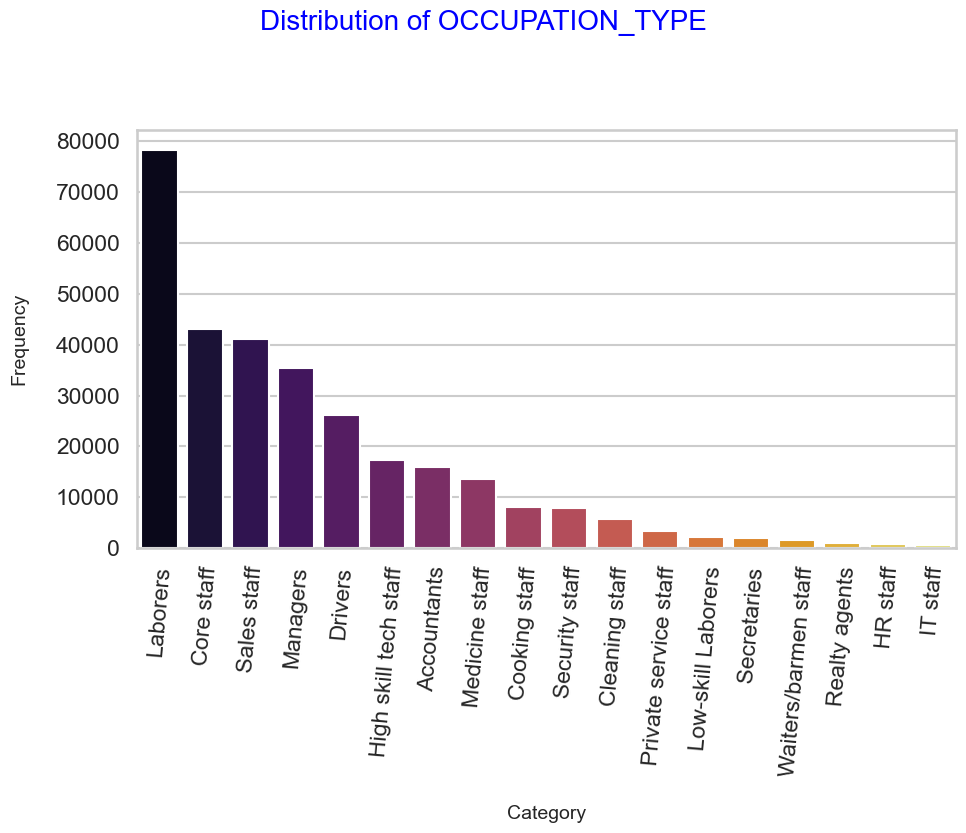

In [17]:
count_plot(applicants,'OCCUPATION_TYPE',rot = 85)

# Comprehensive Data Analysis Reports

---

## Section 1: Income Type Distribution

### Plot Description

This section focuses on the distribution of income types among applicants.

### Findings

1. **Prevalent Income Types:** The most common income types among applicants are "Working" and "Commercial associate," indicating that a substantial portion of applicants falls into these categories.

2. **Few Pensioners:** There are relatively fewer applicants in the "Pensioner" category compared to other income types.

3. **Sparse Data for Maternity Leave:** The "Maternity leave" category has notably sparse data, suggesting it may be an uncommon income type.

### Conclusion

This section provides insights into the distribution of income types among applicants, highlighting the prevalence of certain income types and the presence of sparsely populated categories, such as "Maternity leave."

---

## Section 2: Education Type Distribution

### Plot Description

This section explores the distribution of education types among applicants.

### Findings

1. **Dominance of Secondary Education:** A significant portion of applicants holds "Secondary / secondary special" education as their highest level of education.

2. **Diverse Education Levels:** There is diversity in education levels among applicants, with some holding higher education degrees (e.g., "Higher education" or "Academic degree").

3. **Sparse Data for Incomplete Education:** The categories "Incomplete higher" and "Lower secondary" have fewer applicants, indicating that these education levels are less common among the applicants.

### Conclusion

This section offers insights into the distribution of education types among applicants, emphasizing the prevalence of secondary education and the diversity in educational backgrounds.

---

## Section 3: Family Status Distribution

### Plot Description

This section examines the distribution of family statuses among applicants.

### Findings

1. **Married Applicants Are Most Common:** The majority of applicants are "Married," indicating that this family status is the most prevalent.

2. **Variety in Family Status:** There is some diversity in family statuses, including "Single / not married," "Civil marriage," and others.

3. **Sparse Data for Widow/Widower:** The category "Widow / Widower" has fewer applicants compared to the more common family statuses.

### Conclusion

This section provides insights into the distribution of family statuses among applicants, highlighting the prevalence of "Married" applicants and the presence of less common family statuses.

---

## Section 4: Housing Type Distribution

### Plot Description

This section analyzes the distribution of housing types among applicants.

### Findings

1. **Most Applicants Own or Rent Apartments:** The most common housing types among applicants are "House / apartment" and "With parents." These indicate that the majority either own or rent apartments.

2. **Variety in Housing Types:** There is diversity in housing types, with some applicants living in rented apartments, houses, or having other housing arrangements.

### Conclusion

This section offers insights into the distribution of housing types among applicants, emphasizing the prevalence of "House / apartment" and "With parents" housing types.

---

## Section 5: Occupation Type Distribution

### Plot Description

This section explores the distribution of occupation types among applicants, **noting the presence of missing values (NaN)**.

### Findings

1. **Diverse Occupation Types:** Applicants have diverse occupation types, including "Laborers," "Sales staff," "Core staff," and more.

2. **Missing Occupation Data:** Approximately 134,000 values are missing (NaN) in the occupation type, suggesting a significant amount of data lacks this information.

### Conclusion

This section provides insights into the distribution of occupation types among applicants. However, it's important to note the substantial amount of missing occupation data, which may require further investigation or handling in subsequent analyses.

---

## Overall Conclusion

In conclusion, these comprehensive data analysis reports offer detailed insights into various aspects of applicant data, including income type, education type, family status, housing type, and occupation type. They provide a foundation for further analysis and decision-making, taking into account the prevalence of certain categories and the presence of sparse or missing data where applicable.

---

# **<span style="color:red">Correlation Analysis</span>**

**<span style="color:blue">Analysis Approach:</span>**

To understand the relationships within our dataset, we will perform two distinct correlation analyses:

1. **Categorical Variables Analysis**:
   - For categorical variables, we will employ Cramer's V along with the Chi-square test.
   - This statistical test assesses the independence of categorical variables and unveils potential associations or dependencies between them.

2. **Numerical Variables Analysis**:
   - For numerical variables, we will create a correlation map (correlation matrix).
   - The correlation map visually displays relationships between numerical variables, revealing linear associations and patterns.
   - Additionally, we will compute the Variance Inflation Factor (VIF) to evaluate multicollinearity among numerical features.

These analyses will provide valuable insights into both categorical and numerical aspects of our data, enabling us to uncover significant relationships and patterns.

In [18]:
def split_category(data, categorical=False, numerical=False):
    if categorical:
        categorical_data = data.select_dtypes(exclude=[np.number])
        return categorical_data
    elif numerical:
        numerical_data = data.select_dtypes(include=[np.number])
        return numerical_data
    else:
        raise ValueError("Please specify either 'categorical' or 'numerical' as True to split the data.")


In [19]:
categorical = split_category(applicants,categorical=True)
numerical = split_category(applicants,numerical=True)

In [20]:
def vif_calculation(data):
    # Check for multicollinearity
    vif_data = pd.DataFrame()
    vif_data["features"] = data.columns
    
    vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                            for i in range(len(data.columns))]
    
    # Print the VIF values for each feature
    print("VIF Values:")
    print(vif_data)
    
    # Print variables with high VIF
    print('~~~~~~~~~')
    print(f"Variables with High VIF:\n{vif_data[vif_data['VIF'] >= 5]}")

In [21]:
vif_calculation(numerical)

VIF Values:
           features         VIF
0                ID    1.001942
1      CNT_CHILDREN    4.768213
2  AMT_INCOME_TOTAL    1.038457
3        DAYS_BIRTH    1.759502
4     DAYS_EMPLOYED    1.708922
5        FLAG_MOBIL  155.022191
6   FLAG_WORK_PHONE    1.179469
7        FLAG_PHONE    1.104457
8        FLAG_EMAIL    1.029106
9   CNT_FAM_MEMBERS    4.627808
~~~~~~~~~
Variables with High VIF:
     features         VIF
5  FLAG_MOBIL  155.022191


In [22]:
numerical_corr = numerical.corr()

In [23]:
def plot_correlation_heatmap(data):
    """
    Create and display a correlation heatmap for numerical variables.

    Parameters:
    data (DataFrame): The input DataFrame containing numerical variables.

    Returns:
    None
    """
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1.2)
    
    # Create a more visually appealing color palette
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Calculate the correlation matrix
    numerical_corr = data.corr()
    
    # Create the correlation heatmap with enhanced customization
    sns.heatmap(
        numerical_corr, 
        annot=True,
        annot_kws={'size': 12},  # Increase annotation font size
        cmap=cmap,  # Use the custom color palette
        linewidths=0.5,
        fmt=".2f",
        cbar=True,
        square=True,
        center=0,  
        cbar_kws={'label': 'Correlation'},
    )
    
    # Customize labels, title, and rotation for x-axis labels
    plt.xlabel('Variables', fontsize=14)
    plt.ylabel('Variables', fontsize=14)
    plt.title('Correlation Heatmap', fontsize=16)
    plt.xticks(rotation=90)
    
    # Show the plot
    plt.show()

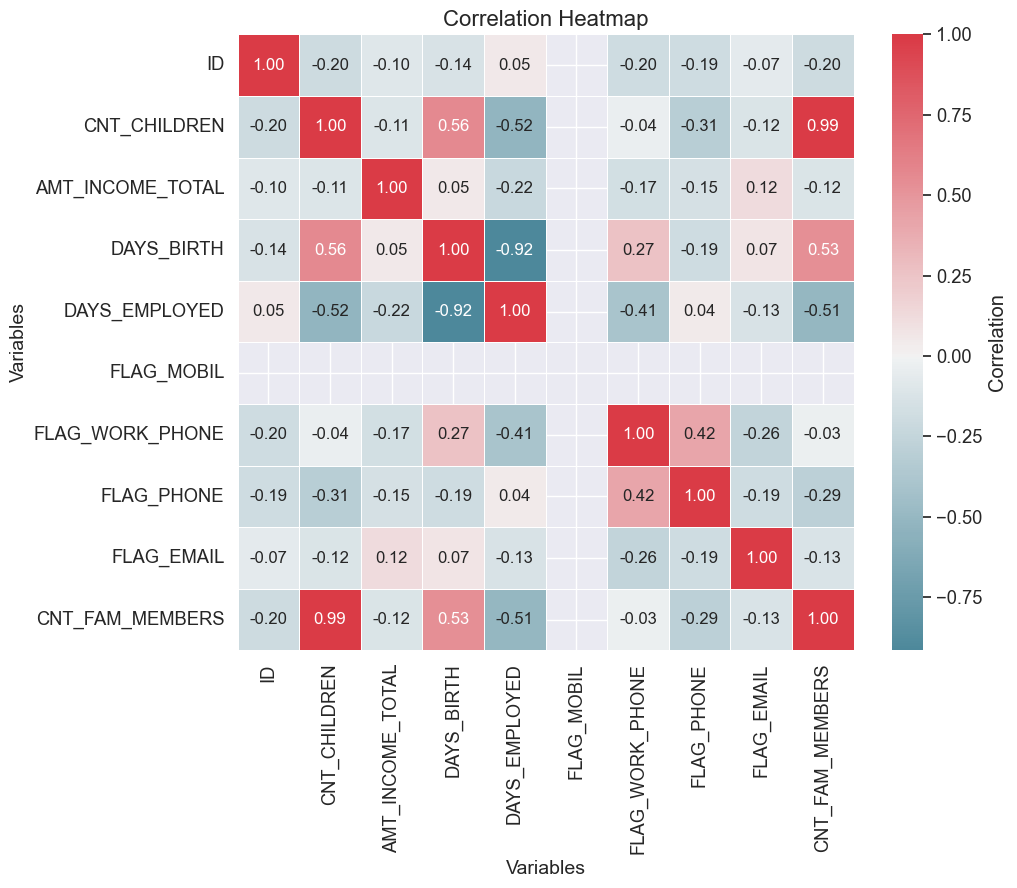

In [24]:
plot_correlation_heatmap(numerical_corr)

### Performing Chi-square test

In [25]:
# Extracting column names 
column_names = categorical.columns
# Assiging column names to row indexs 
chisqmatrix=pd.DataFrame(categorical,columns=column_names,index=column_names)

In [26]:
for icol in column_names:  # Loop over each column (categorical variable) in the DataFrame.
    for jcol in column_names:  # Nested loop to compare with each other column.

        # Create a contingency table for the two categorical columns icol and jcol.
        mycrosstab = pd.crosstab(categorical[icol], categorical[jcol])

        # Perform a chi-square test of independence on the contingency table.
        chi2, _, _, _ = stats.chi2_contingency(mycrosstab)

        # Calculate Cramér's V for the association between icol and jcol.
        n = mycrosstab.values.sum()  # Calculate the total number of observations.
        V = np.sqrt(chi2 / (n * (min(mycrosstab.shape) - 1)))  # Compute Cramér's V.
        V = round(V, 3)  # Round the value to three decimal places for readability.

        # Store the calculated Cramér's V value in the chisqmatrix DataFrame.
        chisqmatrix.loc[icol, jcol] = V
        
# Make values inside chisq matrix float
chisqmatrix = chisqmatrix.astype(float)

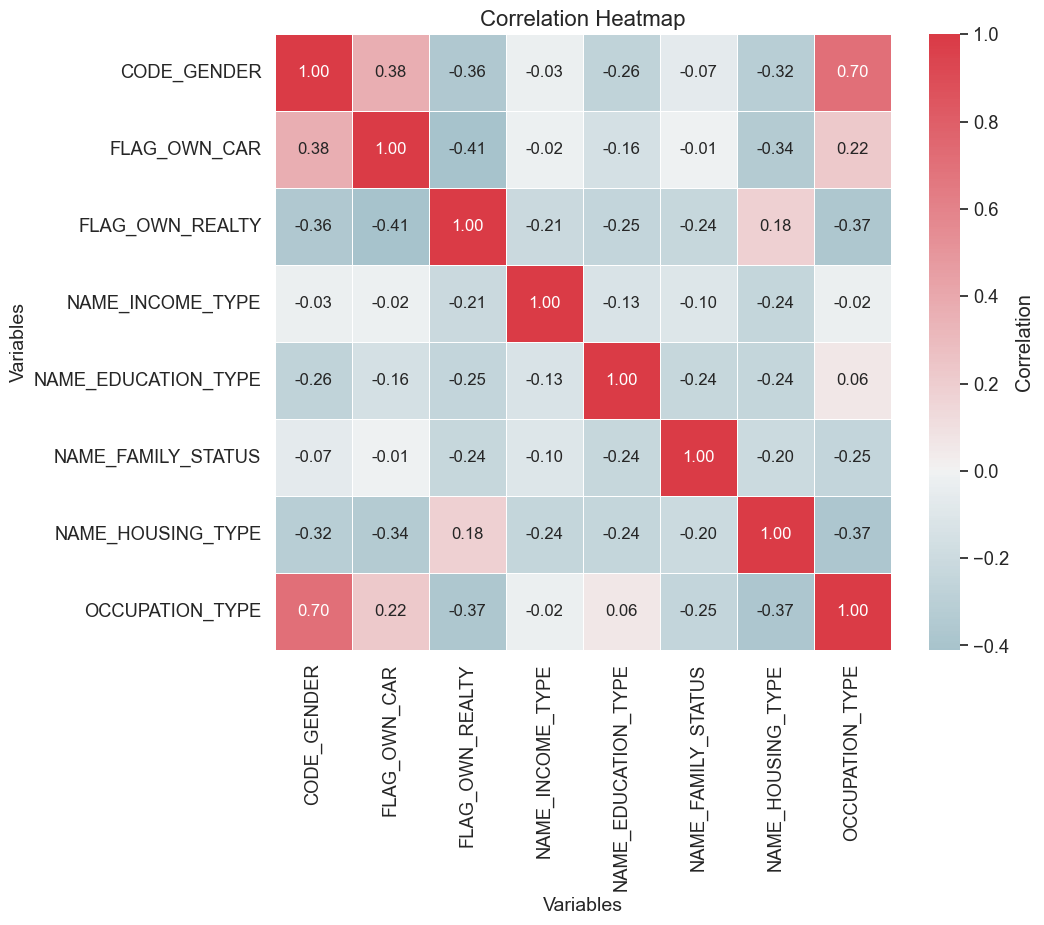

In [27]:
plot_correlation_heatmap(chisqmatrix)

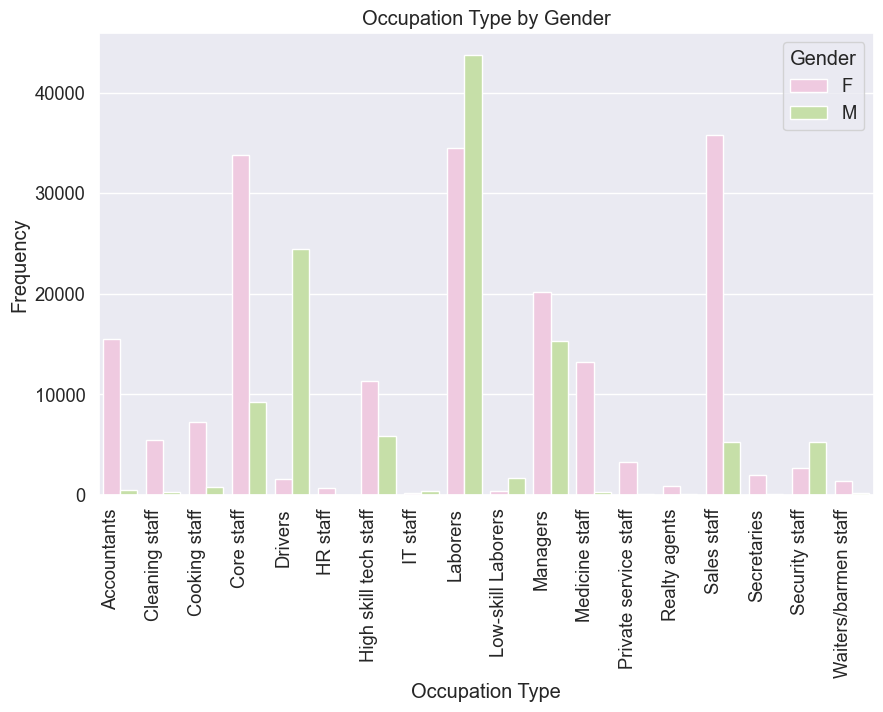

In [28]:
grouped = applicants.groupby(['OCCUPATION_TYPE', 'CODE_GENDER']).size().reset_index(name='Count')

# Create a stacked bar plot using Seaborn with the 'PiYG' color palette
plt.figure(figsize=(10, 6))
sns.barplot(x='OCCUPATION_TYPE', y='Count', hue='CODE_GENDER', data=grouped, palette='PiYG')

# Customize the plot
plt.title('Occupation Type by Gender')
plt.xlabel('Occupation Type')
plt.ylabel('Frequency')
plt.legend(title='Gender')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.show()

# <span style="color:blue">Correlation Analysis Report</span>

*<span style="color:blue">Analysis of Categorical and Numerical Variables</span>*

## <span style="color:green">Introduction</span>
This report presents the results of a correlation analysis conducted on a dataset containing both categorical and numerical variables. The analysis aims to identify associations, dependencies, and multicollinearity within the dataset.

## <span style="color:green">Findings</span>

### <span style="color:red">Categorical Variables Analysis</span>
- The Cramer's V heatmap reveals associations between pairs of categorical variables. In this heatmap, a Cramer's V value of 1 signifies a perfect correlation between two variables, while a value of 0 indicates no correlation at all.
- The heatmap can guide feature selection and help understand relationships among categorical variables.

### <span style="color:red">Numerical Variables Analysis</span>
- The VIF analysis identifies numerical variables that may suffer from multicollinearity. Variables with VIF values greater than or equal to 5 are listed, indicating the need for further investigation.
- The correlation matrix heatmap provides insights into linear relationships between numerical variables. Positive correlations are represented in green, while negative correlations are shown in red.

## <span style="color:green">Conclusion</span>
The correlation analysis conducted on the dataset reveals valuable insights into the relationships among variables. It helps in understanding the interdependencies between categorical variables and identifying multicollinearity issues among numerical features. These findings can guide feature engineering and variable selection.

> In our initial analysis of the dataset, we observed two numeric variables that exhibit a strong correlation:

1. **DAY_BIRTHS** and **DAYS_EMPLOYED**: These variables display a strong negative correlation. However, it is important to note that these data have not yet undergone preprocessing. Upon closer inspection, we found that the **DAY_BIRTHS** variable consists of all positive values, while **DAYS_EMPLOYED** contains many negative values And both refer to dates. This suggests that the negative correlation may primarily result from how the data were input into the dataset. Further analysis is required post-preprocessing to better understand this relationship.

2. **CNT_FAM_MEMBERS** and **CNT_CHILDREN**: These variables exhibit a strong positive correlation. As expected, an increase in the number of children corresponds to an increase in the count of family members. This relationship is intuitive and aligns with our expectations.

3. **CODE_GENDER** and **OCCUPATION_TYPE**: The two variables show a fairly significant correlation of .70 points.
Looking at the graph above it is evident that women dominate in essentially all jobs except as a laborer and a few others.
This may also be due to the fact that the female component in the dataset is as mentioned above significantly higher than the male component.


In our upcoming analysis, we will perform data preprocessing to address any data anomalies or inconsistencies, which will allow us to draw more accurate conclusions regarding the correlations observed.

## <span style="color:green">Recommendations</span>
- For categorical variables, consider using the results of Cramer's V analysis to inform feature selection and potentially reduce dimensionality.
- <span style="color:red">**Note: The variable 'FLAG_MOBIL' exhibits an extremely suspiciously high multicollinearity, which may cause issues in the correlation matrix. This variable should be treated carefully in the preprocessing phase.**</span>
- Address multicollinearity issues among numerical variables with high VIF values, either by removing redundant features or employing dimensionality reduction techniques.


> <span style="color: #228B22; font-size: 32px; font-weight: bold;">Credit Dataset Exploration</span>

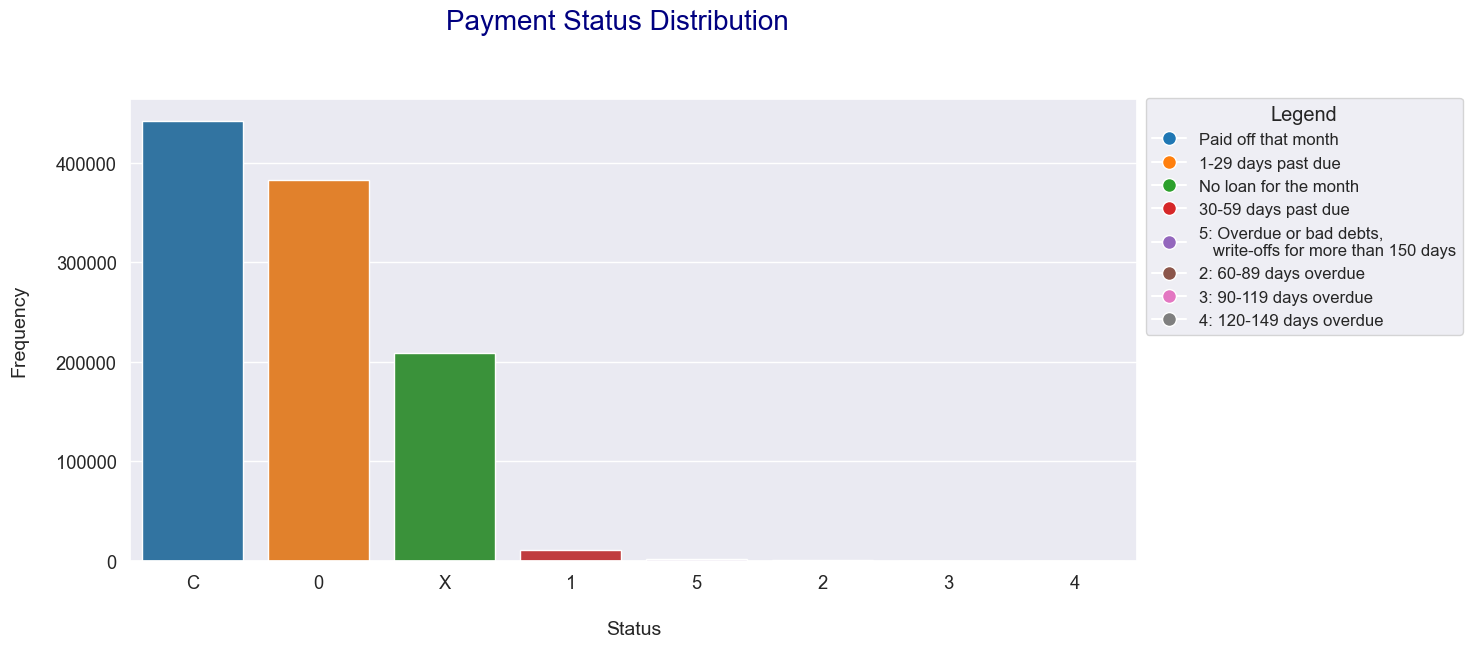

In [29]:
# Create the countplot
plt.figure(figsize=(13, 6))
ax = sns.countplot(x=credit['STATUS'], order=credit['STATUS'].value_counts().index, palette='tab10')

# Add labels for the y-axis and x-axis
plt.ylabel('Frequency', fontsize=14, labelpad=20)
plt.xlabel('Status', fontsize=14, labelpad=20)

# Add a super title with better alignment and color
plt.suptitle('Payment Status Distribution', size=20, color='navy', y=1.03)

# Custom legend
legend_labels = ['Paid off that month', '1-29 days past due', 'No loan for the month',
                 '30-59 days past due', '5: Overdue or bad debts,\n   write-offs for more than 150 days',
                 '2: 60-89 days overdue', '3: 90-119 days overdue', '4: 120-149 days overdue']

# Match the colors to the plot
colors = sns.color_palette('tab10')[:len(legend_labels)]

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
                  for color, label in zip(colors, legend_labels)]

# Place the legend outside of the plot and specify the number of columns (ncol) and arrange labels in rows (mode)
plt.legend(handles=legend_handles, title='Legend', bbox_to_anchor=(1, 1.02), loc='upper left', fontsize=12, ncol=1)

# Show the plot
plt.show()


# Analysis Report: Payment Status

## Introduction

This analysis delves into the payment status of a dataset, emphasizing the implications of various payment categories denoted by the 'STATUS' variable. The goal is to extract meaningful insights from the distribution of these payment categories.

## Key Implications

### Payment Behavior Insights

The plot reveals significant insights into payment behavior based on the 'STATUS' variable:

1. **'0: 1-29 days past due' Dominates:** The most prevalent payment status is '0: 1-29 days past due.' This finding suggests that a considerable portion of individuals tend to be slightly delayed in their payments, possibly indicating minor financial challenges or delayed payments.

2. **'X: No loan for the month' Signifies No Borrowing:** The second most common category, 'X: No loan for the month,' highlights individuals who did not take out a loan during the specified period. This observation is critical, as it shows the proportion of individuals who are not currently engaged in borrowing activities.

3. **Diverse Payment Scenarios:** The distribution of payment statuses indicates a diverse set of payment scenarios, ranging from those who pay off their debts promptly ('C: paid off that month') to those who experience significant delays ('5: overdue or bad debts, write-offs for more than 150 days').

### Financial Health Implications

The payment status data provides insights into the financial health of individuals:

- **'C: paid off that month'**: Individuals in this category exhibit a healthy financial behavior, as they consistently pay off their debts each month.

- **'0: 1-29 days past due'**: While this category indicates minor delays, it may suggest that some individuals face occasional financial challenges or have irregular payment schedules.

- **'5: overdue or bad debts, write-offs for more than 150 days'**: This category raises concerns about individuals facing severe financial difficulties, leading to substantial delays and potential write-offs.

## Conclusion

The analysis of payment statuses extends beyond a simple distribution chart. It offers valuable insights into payment behavior, financial health, and potential areas for decision-making and risk management.

<span style="background-color: #A52A2A; color: white; padding: 5px 10px; font-size: 52px;"> STARTING PREPROCESSING</span>

# What to do now:

1. **Numerical Column Transformation**: Begin by exploring how to transform numerical columns related to dates for better analysis. This may involve converting date columns to more interpretable formats or extracting meaningful features from them.

2. **Skewed Distributions**: Address and transform strongly skewed distributions to make them more "normal." Techniques such as log transformation or box-cox transformation can be considered to improve the distribution of numerical data.

3. **FLAG_MOBIL Correlation Issues**: Investigate and resolve critical correlation issues in the 'FLAG_MOBIL' column. High multicollinearity or suspiciously high correlations may require further analysis or preprocessing.

4. **Feature Engineering**: Evaluate whether it's beneficial to consolidate features related to phone ownership into one feature for simplification and improved interpretability. This can help reduce dimensionality and enhance model interpretability.

5. **Missing Data**: Develop a strategy to handle NaN values in the 'occupation type' feature to ensure data completeness. This may involve imputation techniques or carefully assessing the impact of missing data on the analysis.

6. **Data Type Correction**: Consider converting the variable related to the number of children from float to integer. While it's unlikely that anyone has 2.5 children, it's important to ensure data accuracy and consistency.

7. **Outliers Removal**: Explore the presence of outliers in the dataset and decide on an appropriate approach for handling them. Outliers can significantly impact the analysis and modeling process.


In [30]:
# as sad before we got something like 134K NaN values
applicants['OCCUPATION_TYPE'].isna().sum()

134203

In [31]:
# In that way we substitute NaN values with a more generic unknown
applicants['OCCUPATION_TYPE'].fillna('unknown',inplace = True)
# And the NaN values are gone
applicants['OCCUPATION_TYPE'].isna().sum()

0

In [32]:
current_date = datetime.now()

In [33]:
# This set 'DAYS_BIRTH' variable in a correct format
def calculate_date(date):
    actual_date = current_date + timedelta(days=date)
    return actual_date.strftime('%Y-%m-%d')

# Apply the calculate_date function to transform DAY_BIRTH into a normal date
applicants['DAYS_BIRTH'] = applicants['DAYS_BIRTH'].apply(calculate_date)
applicants['DAYS_BIRTH'] = pd.to_datetime(applicants['DAYS_BIRTH'])

In [34]:
# Now that we have Birthday, we can extrapolate the age of applicant!
applicants['age'] = (current_date - applicants['DAYS_BIRTH']).dt.days // 365

In [35]:
# make bins for age, should be more easy to encode later
bins = [20, 30, 40, 50, 60, 68]  # Define the age bins
labels = ['20-30', '31-40', '41-50', '51-60', '61-68']  # Define labels for each bin

# Create a new column 'AgeGroup' with the age groups
applicants['age'] = pd.cut(applicants['age'], bins=bins, labels=labels)

In [36]:
col_to_moves = applicants.pop('age')

applicants.insert(10, 'age', col_to_moves)

In [37]:
# DAYS_BIRTH now is useless as a column and we can drop it
applicants.drop('DAYS_BIRTH',axis=1,inplace=True)

In [38]:
# In this way I created a column that tracks applicants currently employed or unemployed.
applicants['EMPLOYED'] = applicants['DAYS_EMPLOYED']

def calculate_employment_status(emp_status):
    if emp_status < 0:
        return "Employed"
    elif emp_status > 0:
        return "Unemployed"
applicants['EMPLOYED'] = applicants['EMPLOYED'].apply(calculate_employment_status)

# we can remove DAYS_EMPLOYED column since we store actual working condition in EMPLOYED column
applicants.drop('DAYS_EMPLOYED',axis=1,inplace=True)

In [39]:
# I place the column on employment status next to the date column on the status

col_to_moves = applicants.pop('EMPLOYED')

applicants.insert(11, 'EMPLOYED', col_to_moves)

In [40]:
# Rename columns
applicants.columns = ['ID','gender','car_owner','realty_owner','children',
                      'income','income_type','education','civil_status','house_type','age',
                      'employed','smartphone','work_phone','phone','email',
                      'occupation_type','fam_members']

In [41]:
# Change type from float to int for family members
applicants['fam_members'] = applicants['fam_members'].astype(int)

In [42]:
# The problem with this variable (FLAG_MOBIL) may be precisely the fact that it contains only one class,
# and this may generate a strong imbalance causes strong multicollinearity and usually not so much information,
# such features are zero-variance features (or constant)
applicants['smartphone'].value_counts()

smartphone
1    438557
Name: count, dtype: int64

In [43]:
# Drop the feature
applicants.drop('smartphone',axis = 1,inplace=True)

In [44]:
# eliminated the smartphone variable alias FLAG_MOBIL other multicollinearity seems to have emerged.
# For now the multicollinearity derived from the ID variable is irrelevant, that variable will come in handy later.
# As for the variable fam_members I am willing to bet that it collides with the children variable.
vif_calculation(applicants.select_dtypes(include=(np.number)))

VIF Values:
      features        VIF
0           ID  18.513578
1     children   5.708091
2       income   3.876514
3   work_phone   1.385709
4        phone   1.534194
5        email   1.141607
6  fam_members  28.200787
~~~~~~~~~
Variables with High VIF:
      features        VIF
0           ID  18.513578
1     children   5.708091
6  fam_members  28.200787


In [45]:
# 'phone columns' where merged
applicants['phone'] = applicants['work_phone'] | applicants['phone']

In [46]:
# Drop work phone
applicants.drop('work_phone',axis=1,inplace=True)

In [47]:
# Drop children column due to high correlation with fam_members
applicants.drop('children',axis = 1,inplace = True)

In [48]:
# In fact eliminating the variable 'children' reduced the multicollinearity considerably,
# it still remains slightly high but let's see if by closing the preprocessing phase we can get it back to normal
vif_calculation(applicants.select_dtypes(include=(np.number)))

VIF Values:
      features       VIF
0           ID  9.647980
1       income  3.870750
2        phone  1.604271
3        email  1.137736
4  fam_members  6.641561
~~~~~~~~~
Variables with High VIF:
      features       VIF
0           ID  9.647980
4  fam_members  6.641561


# <span style="color:red">Understanding the Importance of Gaussian (Normal) Distribution</span>

A Gaussian (normal) distribution holds a pivotal role in statistical analysis and modeling, making it essential to grasp its significance. Its distinct advantages contribute to its widespread adoption in various fields.

**Key Benefits of Embracing Gaussian (Normal) Distribution:**

- **Simplicity**: Gaussian distribution's mathematical simplicity offers an intuitive foundation for statistical analysis.

- **Central Limit Theorem Harmony**: Often, Gaussian distribution aligns harmoniously with the Central Limit Theorem, which underpins many statistical principles.

- **Statistical Inference**: This distribution supports a wide array of common statistical tests, facilitating robust inferential analysis.

- **Robustness Against Outliers**: Gaussian distribution demonstrates resilience against the influence of outliers, ensuring reliable results in the presence of extreme values.

- **Enhanced Predictive Modeling**: Many machine learning and statistical algorithms perform optimally when applied to data that adheres to the Gaussian distribution, resulting in more accurate and interpretable models.

- **Ease of Visualization**: The symmetric, bell-shaped nature of Gaussian distribution simplifies data visualization, aiding in the comprehension of complex datasets.

- **Parameter Estimation Reliability**: Gaussian distribution's stability and reliability make it an attractive choice for estimating population parameters.

Understanding the significance of Gaussian distribution empowers analysts and data scientists to make informed decisions when selecting appropriate statistical methods and modeling techniques, ultimately enhancing the reliability and interpretability of their analyses.


In [49]:
# Create a function who take log of a continous feature to reduce skewness effect
def log_skewness(data,feature,log = False):
    if log:
        return stats.skew(np.log(data[feature]))
    else:
        return stats.skew(data[feature])

In [50]:
def plot_distribution(dataset, variable):
    # Calculate kurtosis
    kurtosis = np.round(stats.kurtosis(dataset[variable]), 2)

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Plot the KDE with log transformation
    sns.set(style="whitegrid")
    ax1 = sns.kdeplot(np.log(dataset[variable]), color='skyblue', fill=True, bw_adjust=20, ax=axes[0])
    axes[0].set_title(f'KDE Plot with log({variable})')
    
    # Add skewness and kurtosis information as legend
    axes[0].legend([f"Skewness: {round(log_skewness(dataset, variable, log=True), 3)}\nKurtosis: {kurtosis}"], loc='upper right', fontsize=10)

    # Plot the KDE without log transformation
    sns.set(style="whitegrid")
    ax2 = sns.kdeplot(dataset[variable], color='red', fill=True, bw_adjust=20, ax=axes[1])
    axes[1].set_title(f'KDE Plot without log({variable})')
    axes[1].set_xticks([])

    # Add skewness and kurtosis information as legend
    axes[1].legend([f"Skewness: {round(log_skewness(dataset, variable), 3)}\nKurtosis: {kurtosis}"], loc='upper right', fontsize=10)

    # Set the overall title
    fig.suptitle(f'Analysis of {variable} Distribution', size=20, color='blue')
    
    # Display the plot
    plt.show()


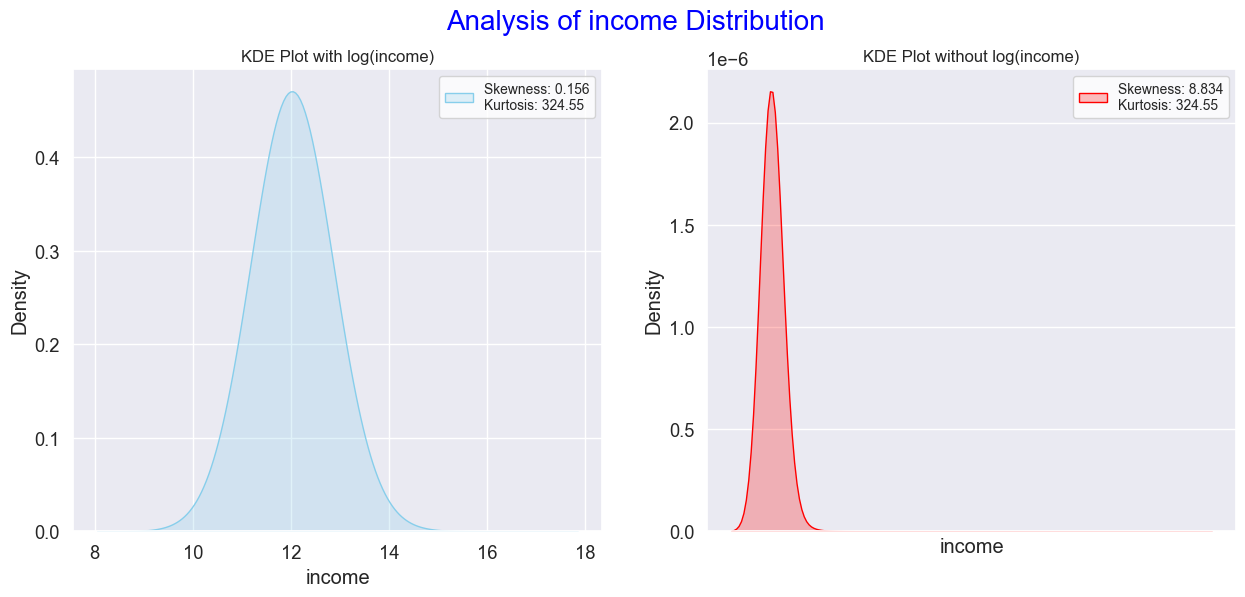

In [51]:
plot_distribution(applicants,'income')

**Explanation:**

The logarithmic transformation has significantly improved the distribution of our data, making it resemble a normal distribution. We can observe a remarkable reduction in skewness, from an initial value of over 8 points to almost 0! This transformation is particularly effective in compressing high values, aligning them more closely with the rest of the data.

However, despite the significant improvement in skewness, our data still exhibits high kurtosis, resulting in a leptokurtic distribution. This suggests the presence of several extreme values or outliers in the dataset. While the logarithmic transformation has helped address skewness, further analysis and outlier treatment may be necessary to achieve a fully normal distribution and ensure the reliability of statistical analyses and modeling techniques.


In [52]:
def pair_qq_plot(data, feature, n=1, m=2):
    """
    Generate Q-Q (Quantile-Quantile) plots for a specified feature in a dataset.

    Parameters:
    - data: The dataset containing the feature to be analyzed.
    - feature: The name of the feature for which Q-Q plots will be created.
    - n: Number of rows in the subplot grid (default: 1).
    - m: Number of columns in the subplot grid (default: 2).

    Returns:
    - None (displays the Q-Q plots).

    Q-Q plots are graphical tools used to assess whether a dataset follows a specific theoretical distribution, such as the normal (Gaussian) distribution.

    Two types of Q-Q plots are created:
    1. Log-Transformed Income: Compares log-transformed feature values to the theoretical quantiles of a normal distribution.
    2. Original Income: Compares original feature values to the theoretical quantiles of a normal distribution.

    These plots help assess how closely the data aligns with a normal distribution. Deviations from a straight line suggest departures from normality.
    """
    
    # Create subplots based on n and m
    fig, axes = plt.subplots(n, m, figsize=(15, 6))

    # Create a Q-Q plot for the log-transformed feature
    stats.probplot(np.log(data[feature]), dist="norm", plot=axes[0])
    axes[0].set_title(f"Q-Q Plot (Log-Transformed {feature})")
    axes[0].set_xlabel("Theoretical Quantiles")
    axes[0].set_ylabel("Sample Quantiles")

    # Create a Q-Q plot for the non-transformed feature
    stats.probplot(data[feature], dist="norm", plot=axes[1])
    axes[1].set_title(f"Q-Q Plot (Original {feature})")
    axes[1].set_xlabel("Theoretical Quantiles")
    axes[1].set_ylabel("Sample Quantiles")

    plt.tight_layout()  # Ensures proper spacing between subplots
    plt.show()

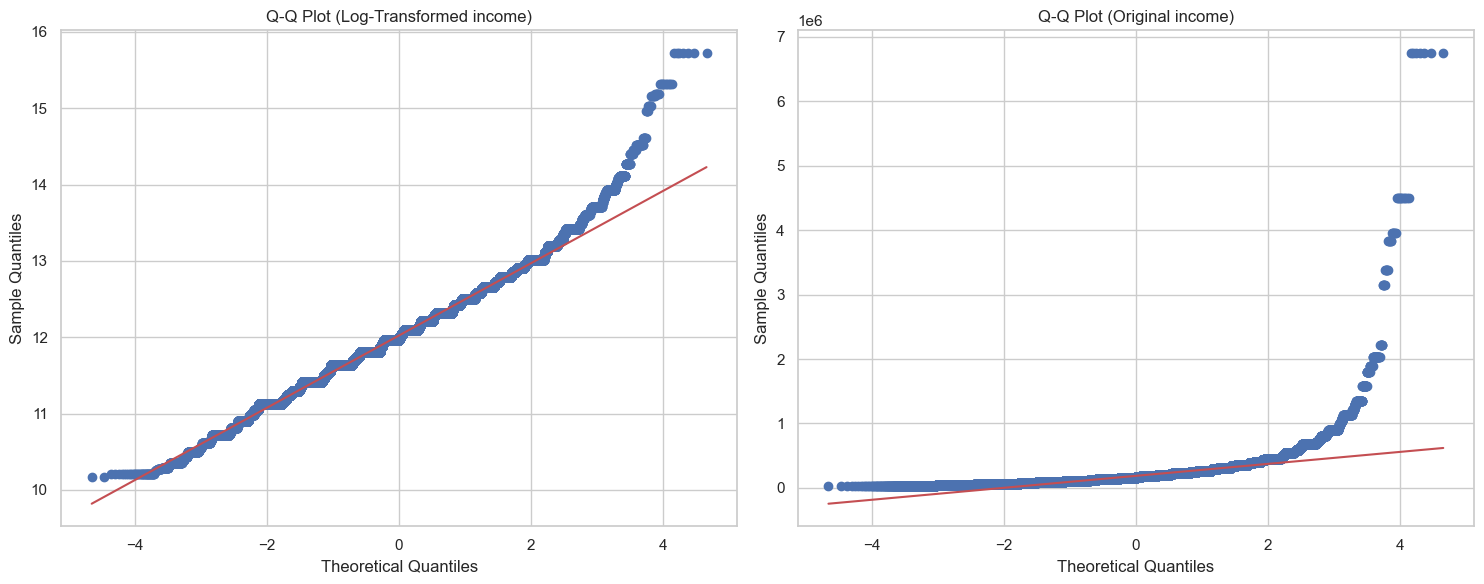

In [53]:
# The QQ-Plot confirm what sad before, there are evident extreme values (outliers)
pair_qq_plot(applicants,'income')

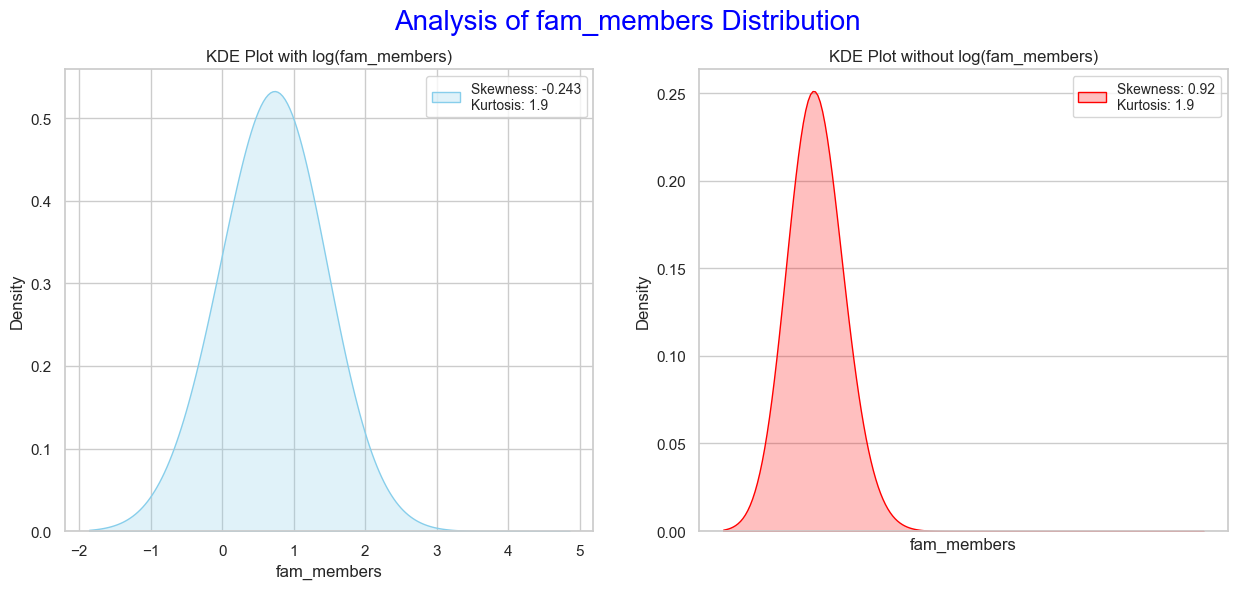

In [54]:
plot_distribution(applicants,'fam_members')

**Explanation**:

In the case above we even go from a strongly positive skewness of over .90 to a negative skewness of -.24 by performing the logarithmic transformation.
Notice how the kurtosis is even less than the value of 3, nevertheless no, the distribution is not platicurtic at all, it simply has extreme values toward the right tail.

# <span style="color:red">Check outliers</span>

In [55]:
def plot_boxplot(data,feature):
    fig, axes = plt.subplots(1, 2, figsize=(8, 6))

    # Create a boxplot without outliers in the first subplot
    ax1 = sns.boxplot(data=data, y=feature, showfliers=False, ax=axes[0])
    axes[0].set_title('Without Outliers')

    # Create a boxplot with outliers in the second subplot
    ax2 = sns.boxplot(data=data, y=feature, ax=axes[1])
    axes[1].set_title('With Outliers')
    # Show the plots
    plt.show()
    

##### *As expected from the plots below there are several outliers to clean up!*

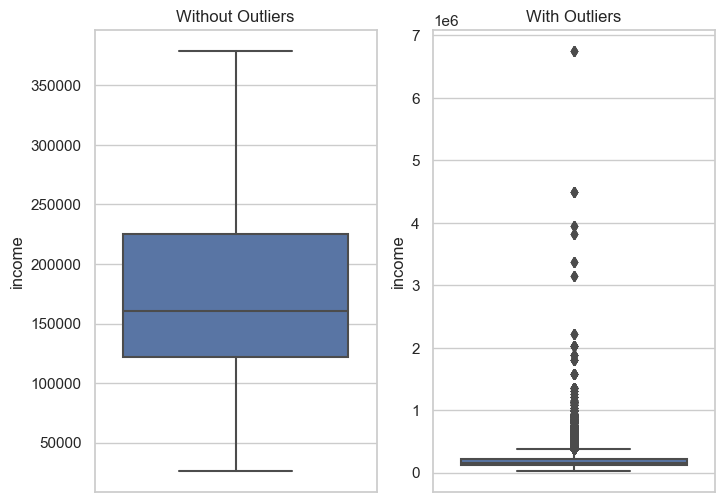

In [56]:
plot_boxplot(applicants,'income')


In [57]:
# Do you remember that we try to calculate area under the curve between the min value of Income and 500K?, well, looking a these
# boxplot we could define a better(?) maximum range approximated to 380K.
# How many data lies under the curve between min value and 380K?
start_point = applicants['income'].min()
end_point = applicants[applicants['income'] <= 380000]['income'].max()

# If we decide to cut off outliers above 380K we should lost about 8% of data of that specific variable
integral(applicants,'income',start_point,end_point)

'The percentage of the area under the curve between 26100.0 and 378900.0 is about: 92.24%'

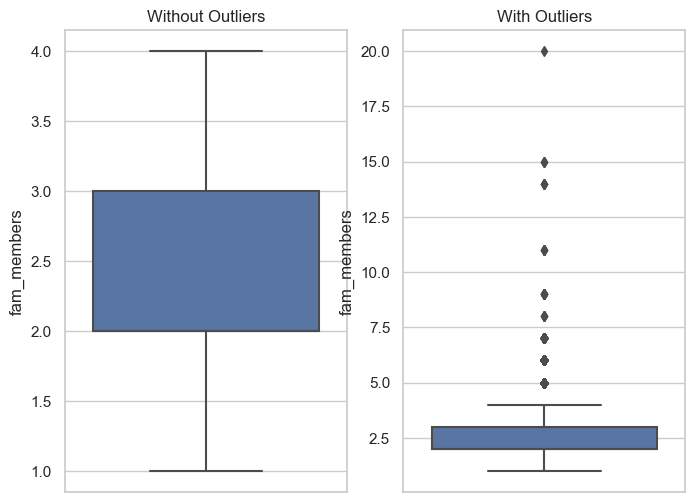

In [58]:
plot_boxplot(applicants,'fam_members')

> ### Using *Isolation Forest* to detect and cut off outliers

In [59]:
# Create an Isolation Forest instance
data = applicants['fam_members'].values.reshape(-1, 1) 
iso_forest = IsolationForest(contamination=.02).fit(data)  # Adjust the contamination hyperparameter

In [60]:
prediction = iso_forest.predict(data)
anomaly_scores = iso_forest.decision_function(data)

In [61]:
outliers = data[np.where(prediction < 0)]

In [62]:
def plot_anomaly(w,h,data,anomaly_scores,outliers,min_xlim = None,max_xlim = None):
    
    plt.figure(figsize=(w, h))
    plt.scatter(data, anomaly_scores, label='Anomaly Scores', c=anomaly_scores, cmap='icefire')
    plt.xlabel('Feature Value')
    plt.colorbar(label='Anomaly Score')
    plt.xlim(min_xlim,max_xlim)
    plt.scatter(outliers, anomaly_scores[prediction == -1], marker='x', s=50, color='blue', label='Outliers')
    
    plt.legend()
    plt.show()
    
    
    if min_xlim == int and max_xlim == int:
        plt.xlim(min_xlim,max_xlim)
    

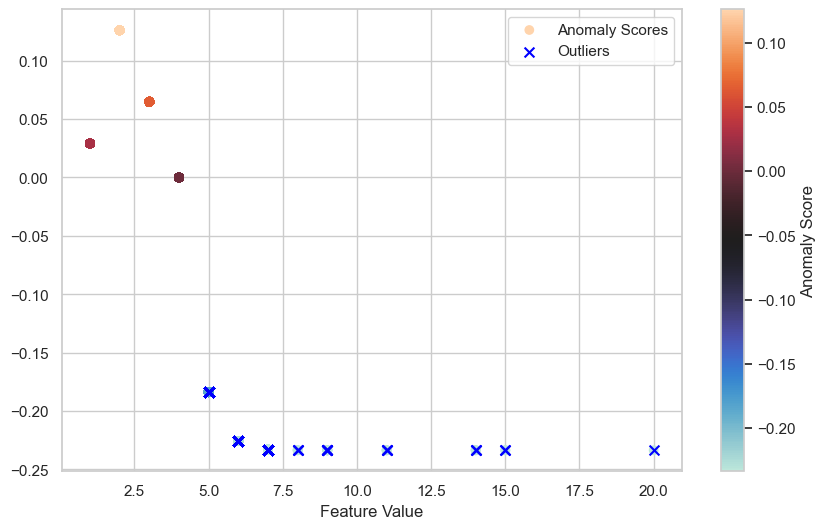

In [63]:
plot_anomaly(10,6,data=data,anomaly_scores=anomaly_scores,outliers=outliers)

In [64]:
print(f"The ratio of outliers trimmed respect to total data: {round((outliers.shape[0]/applicants.shape[0]),2) * 100}%")

The ratio of outliers trimmed respect to total data: 1.0%


In [65]:
mask = prediction != -1
applicants = applicants[mask]

In [66]:
data = applicants['income'].values.reshape(-1, 1)
iso_forest = IsolationForest(contamination=.03).fit(data)

In [67]:
prediction = iso_forest.predict(data)
anomaly_scores = iso_forest.decision_function(data)
outliers = data[np.where(prediction < 0)]

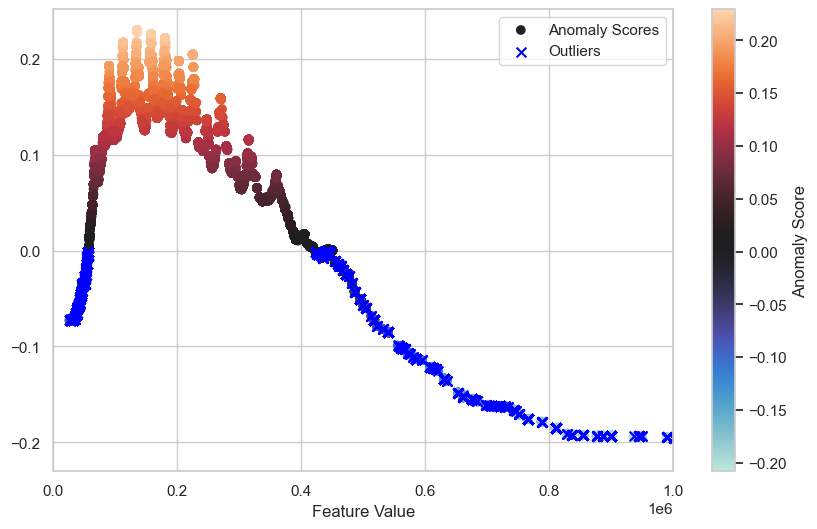

In [68]:
plot_anomaly(10,6,data,anomaly_scores,outliers,
             min_xlim=0,
             max_xlim=1000000)

In [69]:
print(f"The ratio of outliers trimmed respect to total data: {round((outliers.shape[0]/applicants.shape[0]),2) * 100}%")

The ratio of outliers trimmed respect to total data: 3.0%


In [70]:
mask = prediction != -1
applicants = applicants[mask]

# Outlier Detection Report Using Isolation Forest Algorithm

## Approach

### Step 1: Data Preparation

We start by getting our data ready. We focus on two important things: the number of family members ('fam_members') and the income of our applicants ('income').

### Step 2: Finding Outliers in 'fam_members'

We use an algorithm called Isolation Forest to find outliers in the 'fam_members' data.

### Step 3: Visualizing Outliers

We create a picture (a graph) to show which applicants have unusual family member counts. The weird ones are marked with 'x' symbols.

### Step 4: Removing Outliers

After we find the weird cases, we remove them from our data. This helps make our data more reliable.

### Step 5: Finding Outliers in 'income'

We repeat the same process, but this time for the 'income' data. We use the Isolation Forest again, but this time we're looking for about 3% of unusual incomes.

### Step 6: Visualizing Outliers for 'income'

We make another picture to show which applicants have unusual incomes. Again, we mark them with 'x' symbols.

### Step 7: Final Data Cleanup

Just like before, we remove the weird income values from our data.

## What We Found

- For 'fam_members,' about 1% of the unusual cases were removed.
- For 'income,' around 3% of the unusual incomes were removed.

> # Check plots after trimmed outliers

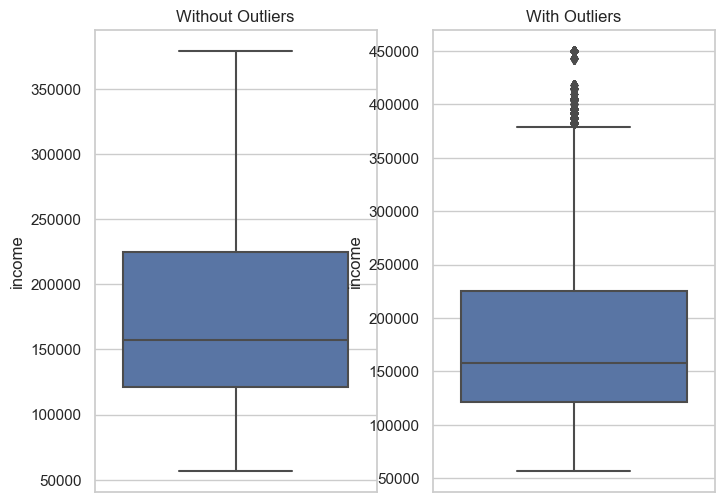

In [71]:
# Here some outliers remain
plot_boxplot(applicants,'income')

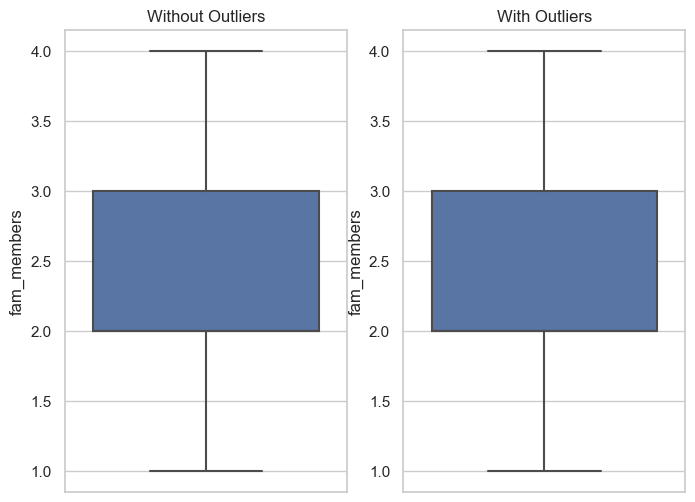

In [72]:
#All outliers where cut off!
plot_boxplot(applicants,'fam_members')

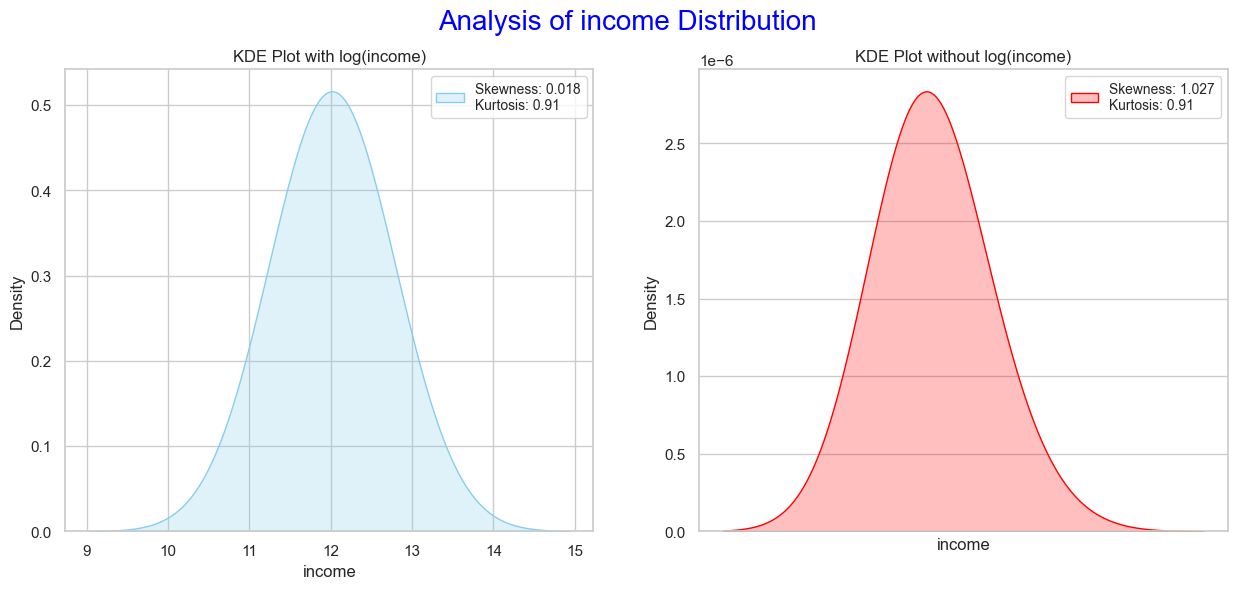

In [73]:

plot_distribution(applicants,'income')

What a remarkable transformation! The distribution without any transformation closely resembles a Gaussian distribution, but with a skewness of approximately 8 points and an astronomical kurtosis value of 324. However, the extreme kurtosis is primarily driven by the presence of outliers.

On the other hand, after applying the log transformation, the distribution on the left becomes nearly identical to a Gaussian distribution. The skewness is dramatically reduced to just 0.018, practically non-existent, and the kurtosis stabilizes at a much more reasonable value of 0.91.

This transformation not only brings the data closer to a normal distribution but also mitigates the impact of outliers, resulting in a distribution that is much more amenable to statistical analyses and modeling.


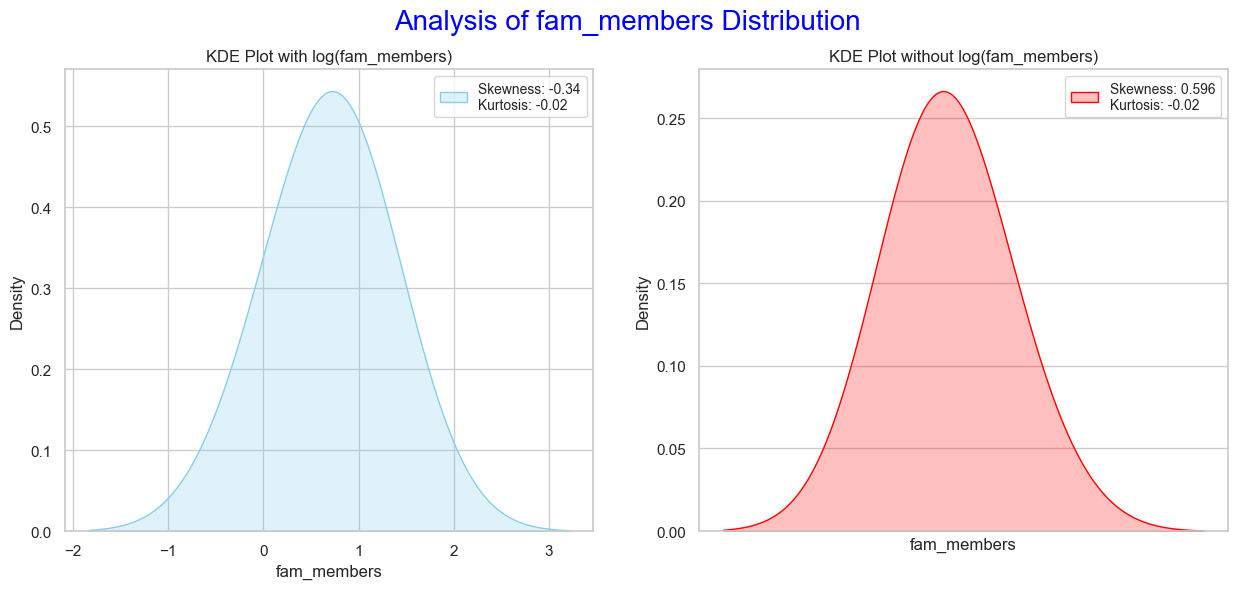

In [74]:
plot_distribution(applicants,'fam_members')

Even in the case of the 'fam_members' variable, we have successfully transformed the distribution to closely resemble a Gaussian distribution. The left-hand distribution, post-logarithmic transformation, is essentially a de facto Gaussian distribution. 

In stark contrast, the distribution on the right, without any transformation, still exhibits slight skewness. This transformation not only aligns the data with a more Gaussian form but also reduces the impact of skewness, making it more suitable for various statistical analyses and modeling techniques.


# Insights from Outlier Detection and Data Transformation

## Introduction

In our analysis, we employed the Isolation Forest algorithm to detect and subsequently remove outliers from our dataset. The objective was to improve the quality and reliability of the data for our analytical and modeling tasks. Below are the key insights we gained from this process.

## Outlier Detection

### 1. 'fam_members' Feature
- The Isolation Forest algorithm effectively identified outliers in the 'fam_members' feature.
- Approximately 1% of the unusual cases in 'fam_members' were detected and removed.

### 2. 'income' Feature
- Similarly, the Isolation Forest algorithm successfully pinpointed outliers in the 'income' feature.
- Roughly 3% of the unusual income values were identified and removed.

## Data Transformation

### 3. 'income' Feature Distribution
- After the removal of outliers from the 'income' feature, **a remarkable transformation was observed**:
  - Skewness reduced significantly from a high value of 8 or more to a much-improved value of 1.
  - Kurtosis, which had been astronomically high at 324 (largely due to outliers), decreased to a more reasonable 0.91.
  - **The post-removal distribution closely resembles a Gaussian (normal) distribution, with a skewness of 0.018, indicating near symmetry.**

### 4. 'fam_members' Feature Distribution
- The 'fam_members' feature also exhibited positive changes:
  - The removal of outliers contributed to reducing skewness, although some slight skewness remains.
  - **The transformation brought the data distribution closer to a Gaussian distribution.**

## Conclusion

The insights derived from our outlier detection and data transformation efforts are pivotal for our data-driven decision-making processes. By removing outliers and improving data distributions, we have enhanced the reliability and suitability of our data for statistical analysis and modeling.

These insights underscore the significance of robust data preprocessing techniques in ensuring the quality and accuracy of our analytical outcomes. Going forward, we should continue to explore and apply data enhancement methodologies to further refine our datasets and extract meaningful insights.

In [75]:
# DELETE PERSONAL INFORMATION DUE TO AVOID DISCRIMINATION OF ANY KIND
applicants.drop('age',axis = 1,inplace = True)
applicants.drop('gender',axis =1,inplace = True)

# <span style="color: #D32F2F">*Mitigating Discriminatory Biases*</span>
### *How Religion, Ethnicity, Sex, or Age can Lead to a Discriminant Model*

##### *How to treat <span style="color: #D32F2F">Gender</span> and <span style="color: #D32F2F">Age</span> features*


### **1. Avoiding Discrimination**

The paramount rationale for the deliberate omission of age and gender within the credit risk for card approval assessment framework is to obviate the specter of discrimination. The inclusion of these attributes as determinants in credit risk for card approval evaluation engenders the potential for unjust practices, casting a pall of inequity over lending institutions. Whether borne of inadvertence or intent, discriminatory lending is a manifest violation of ethical standards and may entail severe legal repercussions, casting aspersions on the integrity of financial institutions.

---

### **2. Legal Compliance**

Numerous jurisdictions have enacted stringent laws and regulations to safeguard against discrimination in lending. The auspices of laws such as the Equal Credit Opportunity Act in the United States unequivocally prohibit lending institutions from considering factors such as age, gender, race, religion, and others in the credit evaluation process. By expunging these features from consideration, institutions align themselves with the letter and spirit of anti-discrimination laws, thus fortifying their legal defenses.

---

### **3. Ethical Considerations**

Ethical principles mandate that lending determinations must pivot exclusively on objective and pertinent financial criteria. Age and gender, bearing no relevance to an individual's credit repayment capacity, ought to be categorically excluded from the calculus. In so doing, institutions uphold the bedrock principles of fairness, impartiality, and societal justice in the realm of credit risk for card approval assessment.

---

### **4. Focus on Financial Factors**

The efficacy of credit risk for card approval modeling is inexorably tethered to the judicious utilization of objective financial variables that directly impact an applicant's creditworthiness. These variables include credit history, income, employment status, debt-to-income ratio, collateral, and other financially germane indicators. The expurgation of age and gender from the equation engenders a model that is inherently more precise and impartial, resulting in defensible, equitable lending determinations.

---

### **5. Mitigating Bias**

Machine learning models, when trained on biased data, serve as unwitting conduits for the perpetuation and amplification of extant societal biases. The introduction of features such as age and gender augments the specter of bias, predisposing certain demographic groups to potential detriment. The deliberate exclusion of these features serves as a potent antidote, mitigating the lurking specter of bias and ensconcing equitable treatment for all applicants.

---

### **Conclusion**

In summation, the deliberate exclusion of age and gender features in the realm of credit risk modeling utilizing machine learning is a sagacious and ethically sound course of action. It serves as an unimpeachable embodiment of ethical principles, legal mandates, and the imperative for impartial and unbiased lending decisions. By embracing this paradigm shift, financial institutions fortify their standing, mitigate legal exposure, and champion societal responsibility in the echelons of the financial industry.

> # Categorize applicants

In [76]:
credit = pd.read_csv('credit_record.csv')

In [77]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [78]:
# Transform MONTHS_BALANCE in a more clear format
def calculate_month(months):
    # Assuming an average of 30.44 days per month
    days = months * 30.44
    actual_date = current_date + timedelta(days=days)
    return actual_date.strftime('%Y-%m-%d')

credit['MONTHS_BALANCE'] = credit['MONTHS_BALANCE'].apply(calculate_month)
credit['MONTHS_BALANCE'] = pd.to_datetime(credit['MONTHS_BALANCE'])

In [79]:
def categorize_payers_by_month(status, month):
    if status  == 'C':
        return 'Good Payer'
    elif status == '0':
        return 'moderate payer'
    elif status in ('1', '2', '3', '4', '5'):
        return 'Bad Payer'
    elif status == 'X':
        return 'No loan'
    else:
        return 'Unknown'

# Assuming your dataset is in a DataFrame named 'df' with columns 'Status' and 'Month'
credit['payer_category'] = credit.apply(lambda row: categorize_payers_by_month(row['STATUS'], row['MONTHS_BALANCE']), axis=1)

In [80]:
credit['payer_category'].value_counts()

payer_category
Good Payer        442031
moderate payer    383120
No loan           209230
Bad Payer          14194
Name: count, dtype: int64

In [81]:
# Group data by Month and Payer Category, then count the occurrences
payer_counts = credit.groupby(['MONTHS_BALANCE', 'payer_category']).size().reset_index(name='Count')

In [82]:
# Create an interactive line plot with Plotly
fig = px.line(
    payer_counts,
    x='MONTHS_BALANCE',
    y='Count',
    color='payer_category',
    title='Trend of Payers Over Time',
)

# Customize the trace colors, markers, and line styles
fig.update_traces(
    mode='lines+markers',
    line=dict(width=2),  # Increase line width
    marker=dict(size=5),  # Increase marker size
)

# Customize the layout
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Count',
    legend_title='Payer Category',
    xaxis=dict(tickangle=-45),  # Rotate x-axis labels
    width=1000,  # Set plot width
    height=500,  # Set plot height
    margin=dict(r=20),  # Add margin to the right side
    legend=dict(  # Adjust legend position
        x=1.05,  # Shift legend to the right
        y=0.5,  # Center legend vertically
    ),
)

# Add gridlines
fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray')

# Customize the plot background color
fig.update_layout(
    plot_bgcolor='white',  # Set plot background color
)

# Show the interactive plot
fig.show()


### Categorization Criteria

1. **Good Payer (Category: 'Good Payer')**: Individuals falling into this category are considered exemplary in their payment behavior. They consistently pay off their loans for the respective month, indicating responsible and reliable payment habits.

2. **Moderate Payer (Category: 'Moderate Payer')**: Individuals in this category exhibit moderate payment behavior. They have no Days Past Due (DPD) for the month, indicating that they manage to make timely payments without any significant delays.

3. **Bad Payer (Category: 'Bad Payer')**: This category encompasses individuals with varying degrees of payment delays. They are categorized based on different DPD values ('1', '2', '3', '4', '5'). The higher the DPD value, the worse the payment behavior.

4. **No Loan (Category: 'No Loan')**: Individuals in this category have no active loans for the respective month ('X'). They may have already paid off their loans or never taken out a loan during that specific period.

5. **Unknown (Category: 'Unknown')**: This category includes individuals with status codes not covered by the above categories. It serves as a catch-all category for any unique or unclassified cases.

## Analysis and Visualization

1. We examined how many borrowers fell into each of these categories to understand our dataset better.

2. We then created a graph to show how these categories change over time.
The graph helps us see trends, like when more people are paying on time or running into difficulties.

In fact looking at the graph we can see that:

- Good payers are growing steadily (which is good)
- Moderately good payers in the last period are experiencing a decline
- Payers without loans are increasing
- Bad payers remain constant

<span style="background-color: #A52A2A; color: white; padding: 5px 10px; font-size: 36px;">PUT IT ALL TOGETHER AND CONCLUDE PREPROCESSING</span>

## Building the Binary Target Variable 'payer_category'

The 'payer_category' target variable is created to categorize individuals within a dataset based on their payment behavior for each month. However, for the sake of simplicity and to facilitate binary classification, we've decided to use only two classes instead of four.

### Why Binary Classification?

Instead of using four classes to classify payment behavior, we have opted for binary classification with two classes: 'Good Payer' and 'Bad Payer.' This decision is based on several considerations:

1. **Simplicity:** A binary classification simplifies the modeling process, making it easier to interpret and implement.

2. **Reduced Complexity:** Fewer classes mean fewer categories to analyze and predict, reducing the complexity of the classification task.

3. **Clear Distinction:** 'Good Payer' and 'Bad Payer' provide a clear and intuitive division of payment behavior. 'Good Payer' includes individuals who consistently meet their payment obligations ('C' and '0' statuses), while 'Bad Payer' encompasses those who exhibit any other payment behavior.

4. **Focused Analysis:** Binary classification allows us to focus on the most critical aspect of payment behavior: distinguishing between reliable payers and those with potential credit risks.

5. **Easy but effective model:** better a simpler but effective model than a more complex but less reliable model.
Should the model classify a good payer as bad,the lending institution can always conduct a manual search just in case.

*Overall,the binary classification approach strikes a balance between simplicity and effectiveness, enabling us to build a more manageable and interpretable credit risk model.*


In [83]:
def categorize_payers_by_month(status, month):
    if status  in ('C','0','X'):
        return 'Good Payer'
    elif status in ('1', '2', '3', '4', '5'):
        return 'Bad Payer'
    else:
        return 'Unknown'

# Assuming your dataset is in a DataFrame named 'df' with columns 'Status' and 'Month'
credit['payer_category'] = credit.apply(lambda row: categorize_payers_by_month(row['STATUS'], row['MONTHS_BALANCE']), axis=1)

In [84]:
# Finally merge the target variable to our final dataset, ID variable is useless
final_dataset = applicants.merge(credit[['ID', 'payer_category']], on='ID', how='left')

In [85]:
# we could see here that there is a very strong imbalance between classes
final_dataset['payer_category'].value_counts()

payer_category
Good Payer    733169
Bad Payer      11039
Name: count, dtype: int64

In [86]:
# Some cleaning of final_dataset
final_dataset.drop('ID',axis=1,inplace=True)
final_dataset.dropna(subset=['payer_category'], inplace=True)
final_dataset.reset_index(drop=True, inplace=True)

In [87]:
final_dataset.dropna(inplace=True)

<span style="background-color: #A52A2A; color: white; padding: 5px 10px; font-size: 52px;">Build training sets</span>

In [88]:
# The data matrix X
X = final_dataset.drop('payer_category',axis=1)
# The labels
y = final_dataset['payer_category']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X,  
    y, 
    test_size=.3,
    random_state=8986)

In [90]:
encoder = LabelEncoder()

In [91]:
y_train = encoder.fit_transform(np.ravel(y_train))
y_test = encoder.transform(np.ravel(y_test))

<span style="background-color: #A52A2A; color: white; padding: 5px 10px; font-size: 52px;">PIPELINE</span>

In [92]:
# custom log_transformer for skewed distributions
def log_transformer(X):
    return np.log(X)

# alternative to one hot encoder (do not generate additional columns
# and don't cause ordinality)
def binarize_categorical_columns(X):
    for col in X.columns:
        if col in categorical_nominal:
            unique_elements = X[col].unique()
            binary_mapping = {element: i for i, element in enumerate(unique_elements)}
            X[col] = X[col].map(binary_mapping)
    return X

In [93]:
categorical_nominal = ['car_owner','realty_owner','income_type',
                      'civil_status','house_type','employed','occupation_type']

categorical_ordinal = ['education',]

numerical = ['income']


#PIPELINE

ordinal_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder())
])

log_transformer = Pipeline([
    ('log', FunctionTransformer(func=log_transformer,validate=False)),
    ('scaler',StandardScaler())
])

binarizer_transformer = Pipeline([
    ('binarizer',FunctionTransformer(func=binarize_categorical_columns,validate=False))
])


oversampling_transformer = ImbPipeline([
    ('over', RandomOverSampler(sampling_strategy='minority',random_state=8986))  # Adjust 'sampling_strategy' as needed
])

In [94]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', log_transformer, numerical),  # Apply SimpleImputer and StandardScaler
        ('ordinal', ordinal_transformer, categorical_ordinal),  # Apply ordinal encoding
        ('binarizer', binarizer_transformer, categorical_nominal)
    ],remainder='passthrough')

In [95]:
# Perform oversampling on training set
X_train_resampled, y_train_resampled = oversampling_transformer.named_steps['over'].fit_resample(X_train, y_train)

In [96]:
def final_pipeline(model):
    final_pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Assuming preprocessor is defined elsewhere
        ('classifier', model)
    ])
    
    return final_pipeline

<span style="background-color: #A52A2A; color: white; padding: 5px 10px; font-size: 32px;">RANDOMIZED SEARCH WORKFLOW</span>

In [97]:
# Model A: XGBoost Classifier
xgb = XGBClassifier(max_depth=10,n_estimators=10)
param_grid_xgb = {
    'classifier__n_estimators': stats.randint(2,14),
    'classifier__max_depth': stats.randint(2,6),
    'classifier__learning_rate': stats.uniform(loc = .01,scale = 1.0),
    # Add other hyperparameters here
}

# Model B: Balanced Random Forest Classifier
bfc = BalancedRandomForestClassifier(n_estimators=10,max_depth=3,
                                         sampling_strategy='auto',bootstrap=True,
                                         replacement=True,random_state=8986)
param_grid_bfc = {
    'classifier__n_estimators': stats.randint(2,20),
    'classifier__max_depth': stats.randint(1,6),
    # Add other hyperparameters here
}

# Model C: Logistic Regression
logreg = LogisticRegression()
param_grid_logreg = {
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__C': stats.uniform(loc = .01, scale = 1.0),
    'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'classifier__max_iter': [100, 200, 300]
    # Add other hyperparameters here
}

In [98]:
logreg_fit = final_pipeline(logreg).fit(X_train_resampled,y_train_resampled)
xgb_fit = final_pipeline(xgb).fit(X_train_resampled,y_train_resampled)
bfc_fit = final_pipeline(bfc).fit(X_train_resampled,y_train_resampled)

In [99]:
def run_randomized_search(pipeline,param_grid, X, y):
    
    
    random_search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_grid,
        n_iter=5,  # Adjust as needed
        cv=2,       # Number of cross-validation folds
        scoring='accuracy',  # Use the appropriate scoring metric
        random_state=42
    )
    
    random_search.fit(X, y)
    
    
    results = {
        
        'best_params': random_search.best_params_,
        'best_score': random_search.best_score_,
        'cv_results': random_search.cv_results_,
        'best_model': random_search.best_estimator_
        }
    
    return results


In [100]:
logreg_result = run_randomized_search(logreg_fit,param_grid_logreg,
                                      X_train_resampled,y_train_resampled)

/Users/Thomas/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


6 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/Thomas/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Thomas/Library/Python/3.9/lib/python/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/Thomas/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py", line 1162, in

In [101]:
bfc_result = run_randomized_search(bfc_fit,param_grid_bfc,X_train_resampled,y_train_resampled)

In [102]:
xgb_result = run_randomized_search(xgb_fit,param_grid_xgb,X_train_resampled,y_train_resampled)

<span style="background-color: #A52A2A; color: white; padding: 5px 10px; font-size: 32px;">PLOTTING MODEL'S PERFORMANCE</span>

In [103]:
def plot_roc_curve(fpr, tpr, roc_auc):
    # Create a new figure
    plt.figure(figsize=(8, 6))

    # Plot the ROC curve
    sns.lineplot(x=fpr, y=tpr, label=f'ROC-AUC = {roc_auc:.2f}', color='blue', linewidth=2)

    # Plot the random classifier line
    plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=2, label='Random Classifier')

    # Customize the plot
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend(loc='lower right')
    sns.despine()
    plt.grid(True)

    # Show the plot
    plt.show()

In [104]:
def plot_feature_importance(features, importance):
    # Create a DataFrame to store feature names and importance scores
    feature_df = pd.DataFrame({'Features': features, 'Importance': importance})
    
    # Sort the DataFrame by importance in descending order
    feature_df = feature_df.sort_values(by='Importance', ascending=False)
    
    # Create a Seaborn bar plot for feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Features', data=feature_df, palette='viridis')
    
    # Customize the plot
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance')
    
    # Show the plot
    plt.show()

In [137]:
feature_names = [x for x in X_train.columns]

# LOGISTIC REGRESSION PERFORMANCE

In [106]:
best_params_logreg = logreg_result['best_params']
best_logreg = logreg_result['best_model']

# Evaluate the model on the test data
accuracy_logreg = best_logreg.score(X_test, y_test)  # Use best_logreg, not best_params_logreg

# Print the best parameters and accuracy
print("Best Parameters:", best_params_logreg)
print("Accuracy on Test Data:", accuracy_logreg)

Best Parameters: {'classifier__C': 0.9799098521619943, 'classifier__max_iter': 200, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Accuracy on Test Data: 0.4098081634664051


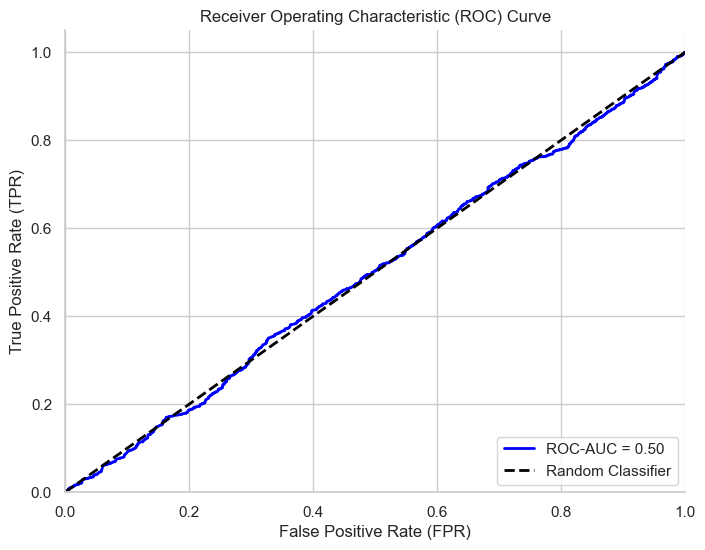

In [107]:
y_pred_prob = best_logreg.predict_proba(X_test)  # Probability of the positive class

# Calculate ROC curve and ROC-AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])  # Use y_pred_prob[:, 1] for the positive class
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])  # Use y_pred_prob[:, 1] for the positive class

plot_roc_curve(tpr,fpr,roc_auc)


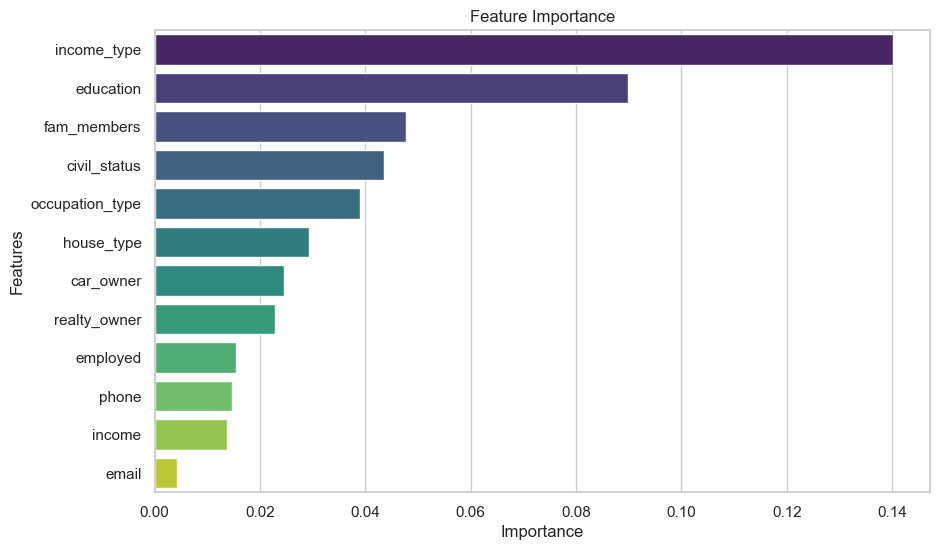

In [108]:
feature_importance_logreg = np.abs(best_logreg.named_steps['classifier'].coef_[0])

plot_feature_importance(feature_names,feature_importance_logreg)

# XGBOOST CLASSIFIER PERFORMANCE

In [109]:
best_params_xgb = xgb_result['best_params']
best_xgb = xgb_result['best_model']

# Evaluate the model on the test data
accuracy_xgb = best_xgb.score(X_test, y_test)

# Print the best parameters and accuracy
print("Best Parameters:", best_params_xgb)
print("Accuracy on Test Data:", accuracy_xgb)

Best Parameters: {'classifier__learning_rate': 0.7896910002727693, 'classifier__max_depth': 2, 'classifier__n_estimators': 8}
Accuracy on Test Data: 0.4134720038698754


In [110]:
feature_importance_xgb = best_xgb.named_steps['classifier'].feature_importances_

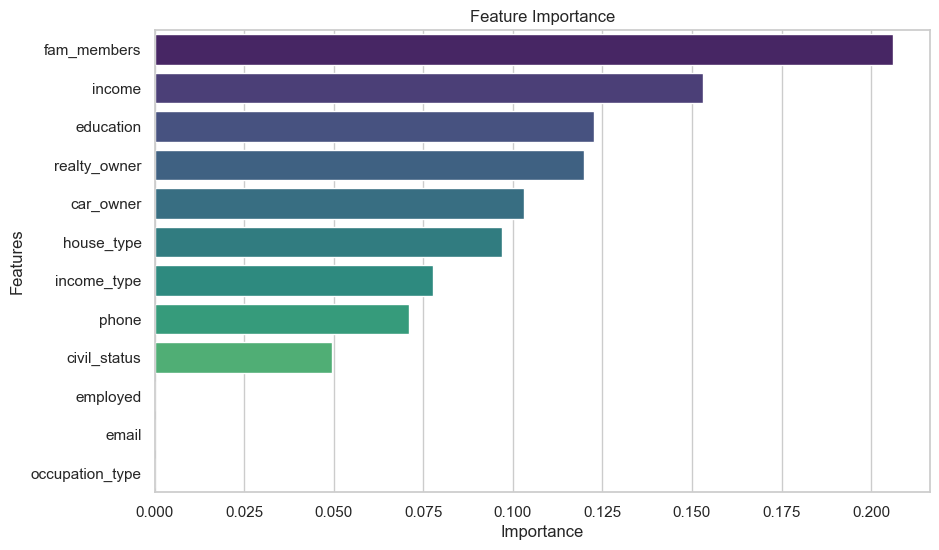

In [111]:
plot_feature_importance(feature_names,feature_importance_xgb)

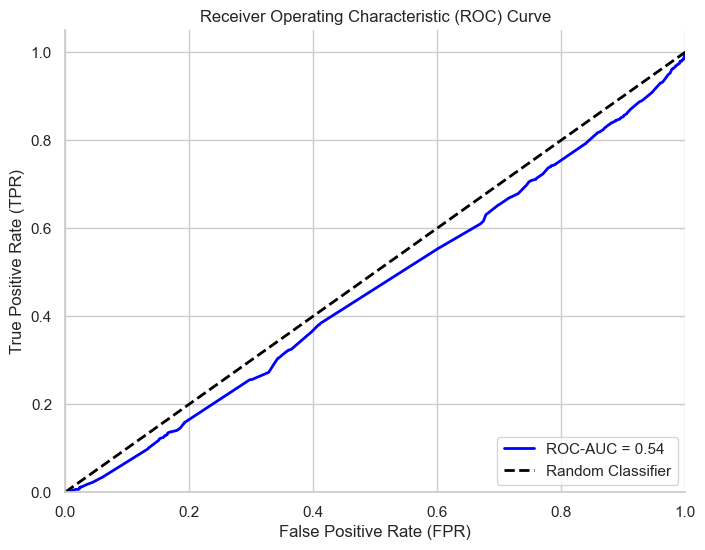

In [112]:
y_pred_prob = best_xgb.predict_proba(X_test)  # Probability of the positive class

# Calculate ROC curve and ROC-AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])  # Use y_pred_prob[:, 1] for the positive class
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])  # Use y_pred_prob[:, 1] for the positive class

plot_roc_curve(tpr,fpr,roc_auc)

# BALANCED RANDOM FOREST CLASSIFIER PERFORMANCE

In [113]:
best_params_bfc = bfc_result['best_params']
best_bfc = bfc_result['best_model']

# Evaluate the model on the test data
accuracy_bfc = best_bfc.score(X_test, y_test)  # Use best_logreg, not best_params_logreg

# Print the best parameters and accuracy
print("Best Parameters:", best_params_bfc)
print("Accuracy on Test Data:", accuracy_bfc)

Best Parameters: {'classifier__max_depth': 3, 'classifier__n_estimators': 9}
Accuracy on Test Data: 0.44059696411855076


In [114]:
feature_importance_bfc = best_bfc.named_steps['classifier'].feature_importances_

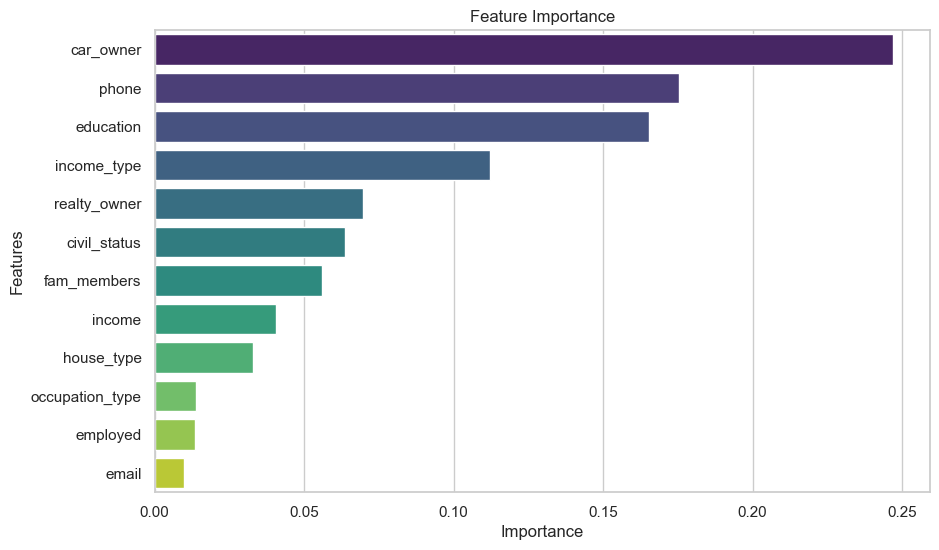

In [115]:
plot_feature_importance(feature_names,feature_importance_bfc)

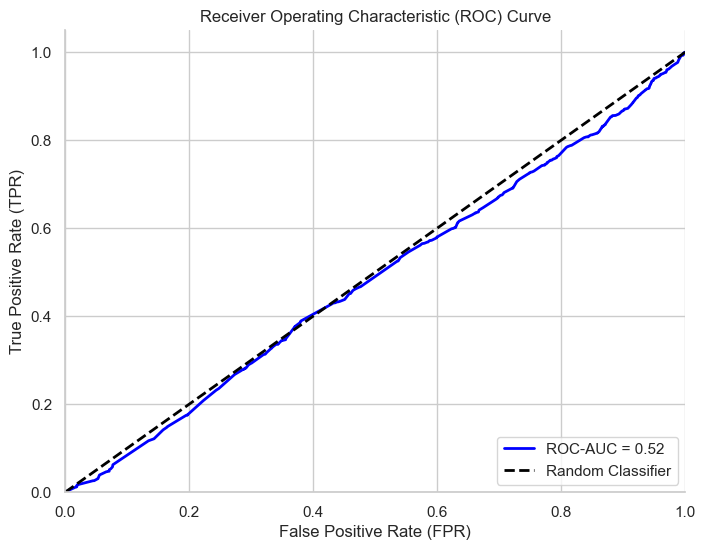

In [116]:
y_pred_prob = best_bfc.predict_proba(X_test)  # Probability of the positive class

# Calculate ROC curve and ROC-AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])  # Use y_pred_prob[:, 1] for the positive class
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])  # Use y_pred_prob[:, 1] for the positive class

plot_roc_curve(tpr,fpr,roc_auc)

# <span style="color: #1976D2">Final considerations</span>

## <span style="color: #388E3C">Introduction</span>

In this report, we present an evaluation of three different classifiers: **Balanced Random Forest**, **Logistic Regression**, and **XGBClassifier**. These classifiers were trained on a dataset with a significant class imbalance issue, which posed substantial challenges to achieving high prediction accuracy.

## <span style="color: #388E3C">Dataset Imbalance</span>

The primary issue that hindered the classifiers' performance was the severe imbalance in the dataset. The target variable, which categorized individuals based on their payment behavior, exhibited a pronounced skew towards certain categories.
The "Good Payer" category dominated the dataset.

## <span style="color: #388E3C">Classifier Performance</span>

### <span style="color: #D32F2F">Balanced Random Forest</span>

Despite using the Balanced Random Forest classifier, which is designed to handle imbalanced datasets, the performance was suboptimal. The classifier struggled to effectively distinguish between different payment behavior categories. The imbalance issue was partially mitigated, but it remained a considerable challenge.

### <span style="color: #D32F2F">Logistic Regression</span>

Logistic Regression, a commonly used classification algorithm, also faced difficulties due to the dataset's severe imbalance. While this algorithm can be robust, it depends on a balanced distribution of classes to achieve accurate predictions. In this case, the imbalance significantly affected its ability to correctly classify individuals.

### <span style="color: #D32F2F">XGBClassifier</span>

XGBClassifier, a gradient boosting algorithm known for its high predictive power, encountered similar challenges. Despite its capacity to build complex models, the class imbalance issue proved to be a significant obstacle. The classifier struggled to differentiate between categories and failed to provide the desired level of prediction accuracy.

## <span style="color: #388E3C">FINAL CONSIDERATION</span>

In conclusion, the dataset's extreme class imbalance posed a substantial hurdle to achieving accurate predictions, regardless of the classifier used. Over and undersampling techniques were employed to address the issue, but the results were still far from satisfactory.

This report underscores the critical importance of dataset balance in machine learning tasks. In scenarios with highly imbalanced datasets, achieving good predictive performance is a formidable challenge. Future efforts to improve prediction accuracy may require more extensive data collection, feature engineering, or alternative modeling techniques specifically tailored to address class imbalance.
